<h1 align="center" style="color:Blue">Project - Visa Application Approval</h1>

**Dataset**: Visa Application Approval dataset  
**Author**: Kiran Kumar N C  
**Dated**: 30/07/2025

### Business Problem

**Q1: Clearly define the business problem and its relevance in the current labor market scenario** 

#### Problem Definition 

    The U.S. labor market is facing a rising demand for skilled workers, which local talent alone cannot always fulfill. As a result, employers are increasingly turning to foreign labor to meet their staffing needs. To regulate this, the Office of Foreign Labor Certification (OFLC) is responsible for reviewing and approving visa applications from employers who wish to hire international workers.

    In FY 2016, the OFLC processed over 775,000 visa applications, marking a 9% increase from the previous year. The current manual review process is time-consuming, error-prone, and unsustainable as application volumes grow. This leads to delays, inconsistent decisions, and inefficient use of government resources.

    To address this issue, the OFLC has engaged EasyVisa , a data science consultancy, to develop a machine learning–based classification model.

#### Objective
    The goal is to analyze historical visa application data and predict whether a visa application is likely to be certified or denied.
    
    The model aims to: 
    
    - Predict whether a visa application is likely to be certified or denied.
    - Identify important factors influencing approval outcomes.
    - Support faster and more reliable decision-making, improving both efficiency and fairness in the visa approval process.

#### Dataset Description
The detailed data dictionary is given below:

 **Feature** and **Description**                                                     
 
- `case_id`: Unique identifier for each visa application                         
- `continent` : Continent from which the employee originates                        
- `education_of_employee` : Education level attained by the employee                    
- `has_job_experience` : Indicates whether the employee has prior job experience (`Y` / `N`) 
- `requires_job_training` : Indicates whether the employee needs job training (`Y` / `N`)       
- `no_of_employees` : Total number of employees in the employer’s organization            
- `yr_of_estab`: Year in which the employer's company was established                
- `region_of_employment` : Region of employment in the U.S.                   
- `prevailing_wage` : Standard market wage for the job in that location                   
- `unit_of_wage` : Time unit for the wage (e.g., Hourly, Weekly, Monthly, Yearly)      
- `full_time_position` : Indicates whether the job is a full-time position (`Y` / `N`)       
- `case_status` : **Target variable**  `Certified` or `Denied`  


<h3 align="center" style="color:Blue">1. Exploratory Data Analysis (EDA)</h3>

In [3]:
# Importing necessary libraries:

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

#sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


In [5]:
# read the data from the csv file intio the variable df_raw to maintain the original dataset.

df_raw = pd.read_csv('EasyVisa.csv')

In [7]:
# copy the data into another variable to keep the original dataset untouch. 
df = df_raw.copy()

In [9]:
# Display the first few rows of the dataset
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
# Display last few rows of the dataset.
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [7]:
# check the shape of the dataset
df.shape

(25480, 12)

- This dataset contain 25480 rows and 12 columns. 

In [ ]:
# Display a concise summary of the DataFrame including column names, non-null counts, data types, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


- The columns `case_id`, `continent`, `education_of_employee`, `has_job_experience`, `requires_job_training`, `region_of_employment`, `unit_of_wage`, `full_time_position`, `case_status` are of object type.
- The columns `no_of_employees`, `yr_of_estab` are of integer type.
- Column `prevailing_wage` is of float type.

In [ ]:
# checking for null values
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

- There are no null values in this dataset. 

In [ ]:
# checking for duplicate values
df.duplicated().sum()

0

- There are no duplicate values in this dataset.

In [ ]:
# Check the unique vaues in each coulmn. 
df.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

In [ ]:
# display the unique value for the below columns. 

columns_of_interest = [
    'continent',
    'education_of_employee',
    'has_job_experience',
    'requires_job_training',
    'region_of_employment',
    'unit_of_wage',
    'full_time_position',
    'case_status'
]

for col in columns_of_interest:
    print(f"Unique values in the column '{col}':")
    print(df[col].unique())
    print(' ' * 1)


Unique values in the column 'continent':
['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
 
Unique values in the column 'education_of_employee':
['High School' "Master's" "Bachelor's" 'Doctorate']
 
Unique values in the column 'has_job_experience':
['N' 'Y']
 
Unique values in the column 'requires_job_training':
['N' 'Y']
 
Unique values in the column 'region_of_employment':
['West' 'Northeast' 'South' 'Midwest' 'Island']
 
Unique values in the column 'unit_of_wage':
['Hour' 'Year' 'Week' 'Month']
 
Unique values in the column 'full_time_position':
['Y' 'N']
 
Unique values in the column 'case_status':
['Denied' 'Certified']
 


In [ ]:
# check the statistical summary of the numerical columns.
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


#### Insights
- The minimum value in the no_of_employees column is -26, which is likely an invalid entry since employee count cannot be negative. This need correction. The maximum value is 602,069, indicating the presence of very large companies.
- In the no_of_employees column, the mean (5,667) is significantly higher than the median (2,109), suggesting a right-skewed distribution.
- The yr_of_estab column shows that companies were established between 1800 and 2016.
- The mean prevailing wage is 74,455.81, while the median is 70,308.21, values that are relatively close, indicating a slightly right-skewed distribution.


In [ ]:
# check the summary of the categorical columns.

df.describe(include=[object, 'category']).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


#### Insights

- In the continent column, there are 6 unique values. Most applicants are from Asia (16,861 out of 25,480).
- education_of_employee column contian 4 levels. Most of the applicants are from Bachelor's degree which 10,234 out of 25,480.
- has_job_experience is binary column contian Y/N values. Majority of applicants have prior job experience (14,802).
- requires_job_training column also a binary column containing Y/N values. Majority of applicants do not require job training (22,525 out of 25,480)
- The region_of_employment column contain 5 unique values, Northeast is the top employment region (7,195).
- unit_of_wage column have 4 values. Year is the most common wage unit (22,962)
- full_time_position is binary column contain Y/N, indicating positions are full-time 22,773.
- case_status column is the target variable. It is a binary outcome contian Certified or Denied. Certified is the most frequent status showing 17,018 out of 25,480

In [ ]:
# check the unique id's form case_id column. 
df.case_id.nunique()

25480

In [ ]:
# Drop case_id column and update the dataframe. 
df.drop('case_id', axis=1, inplace=True)

- Since each case ID is a unique identifier and carries no predictive value, it does not contribute meaningful information for training machine learning models. 

In [ ]:
# From the above stats, we know no_of_employees column contain -ve values. Assuming this could be typo error, 
# either we can remove those values or convert them into positive values. 

df[df['no_of_employees'] < 0].shape[0]

33

In [ ]:
# I take the step to conver them into positive value since I want to keep data as it is without loosing the number of rows. 
df['no_of_employees'] = df['no_of_employees'].abs()


In [ ]:
# Check the no of employess now.
df[df['no_of_employees'] < 0].shape[0]

0

In [ ]:
# post converting the -ve values to +ve values in the 'no_of_employees' column, chek the stats.
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.089207,1979.409929,74455.814592
std,22877.917453,42.366929,52815.942327
min,11.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


#### Insights
- Post converting -ve values to +ve values, the minimum number of employees are 11 and Maximum number of employess are 602069

In [ ]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### Univariate Analysis 


**Q2: Perform univariate analysis on categorical and numerical variables using appropriate plots.**  
**Q3: Comment on the distribution and patterns observed from univariate analysis.**

In [833]:
# Define the Numerical columns 
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define the Categorical columns (object or category types)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Display the results
print("Numerical Columns:")
print(numerical_cols)

print("\nCategorical Columns:")
print(categorical_cols)



Numerical Columns:
['no_of_employees', 'yr_of_estab', 'prevailing_wage']

Categorical Columns:
['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


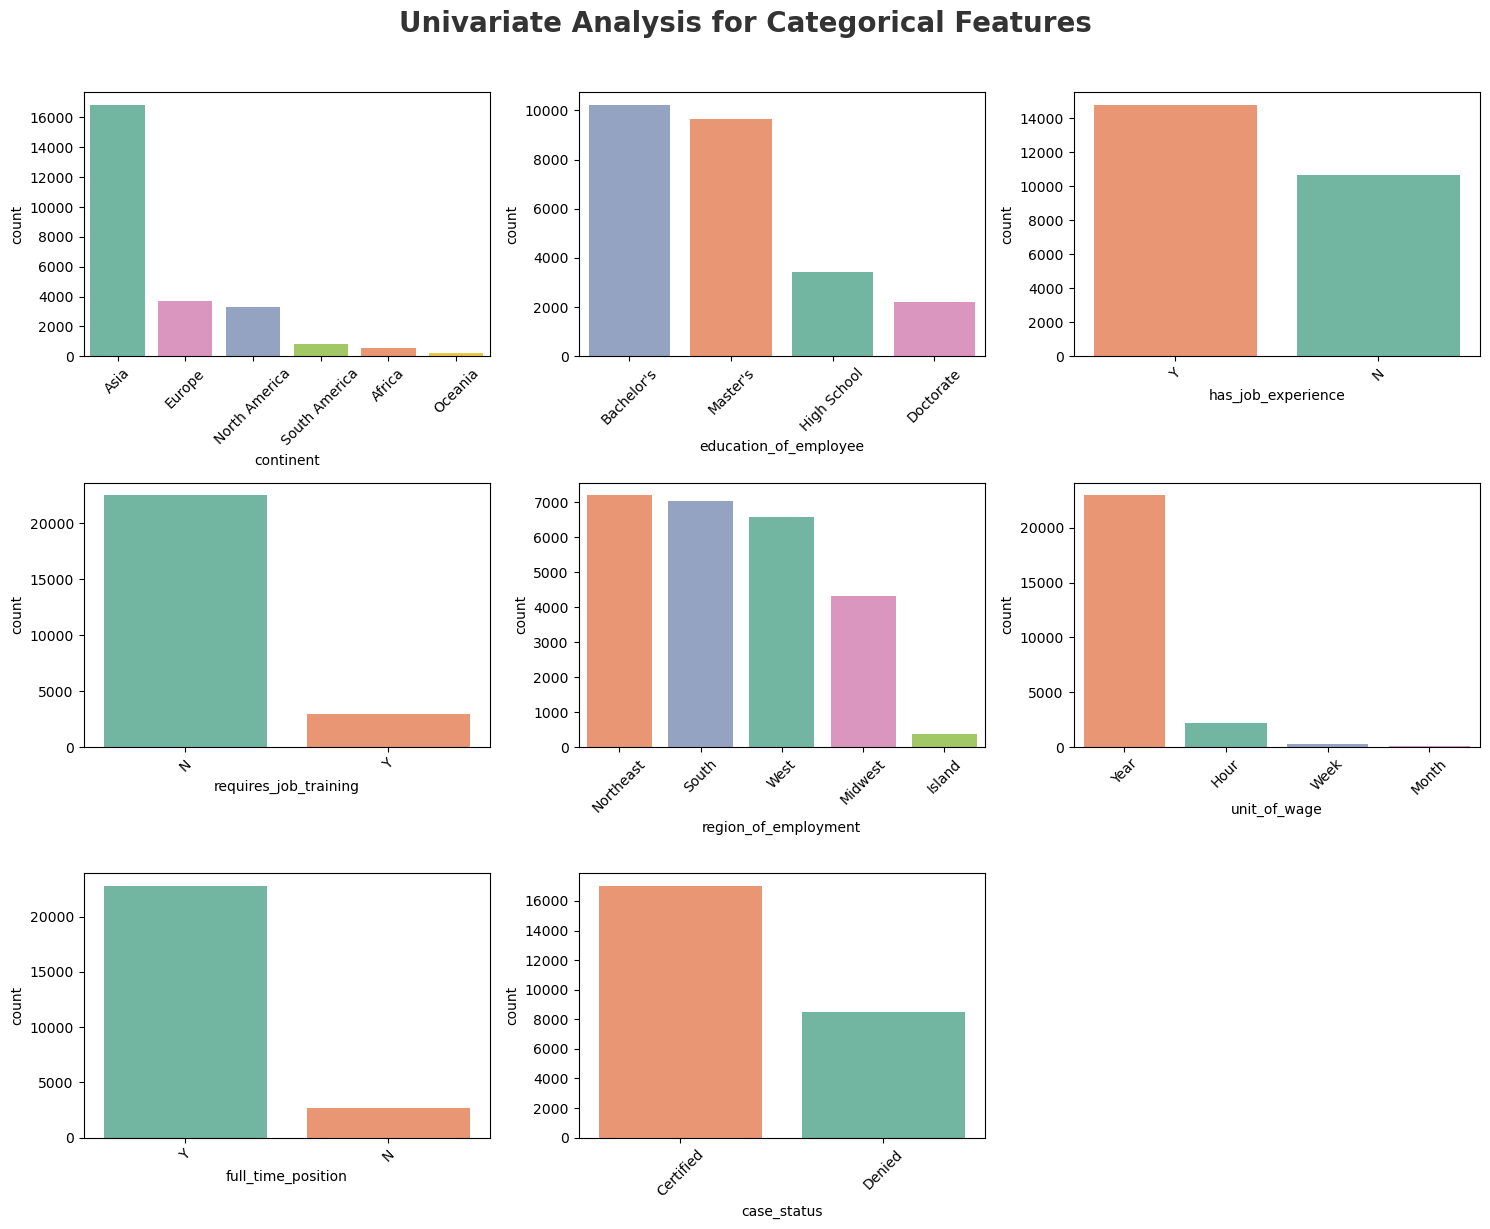

In [835]:
# Univariate analysis for categorical columns. 

#Plotting count distribution of each categorical feature using side-by-side bar charts

plt.figure(figsize=(15, 12))
plt.suptitle('Univariate Analysis for Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)  # Adjust subplot layout as needed
    sns.countplot(
        data=df,
        x=col,
        hue=col,
        order=df[col].value_counts().index,
        palette='Set2',
        legend=False
    )
    plt.xlabel(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### Insigts for the above grpahs.

- Asia dominates in the continent with the highest number of applicants, followed by Europe and North America.
- The highest eucation level is Batchelor's degress with almost equivalent from Master degree. High School and doctorate contribute very less.
- Majority of applicants have prior job experience (14,802). Eventhough significient amount of applicants do not have job experience. 
- Majority of applicants do not require job training (22,525 out of 25,480). Only a small group needs training, which might reflect self-sufficiency
- The Northeast and South region have top employment. Island region has the least activity.
- Year is the most common wage unit (22,962). Few jobs are listed as "Hour", and almost none as "Week" or "Month". This confirms that most jobs are full-time salaried positions.
- Majority positions are full-time 22,773.
- The majority of applications are Certified with the status showing 17,018 out of 25,480. A smaller, but notable, portion are Denied.

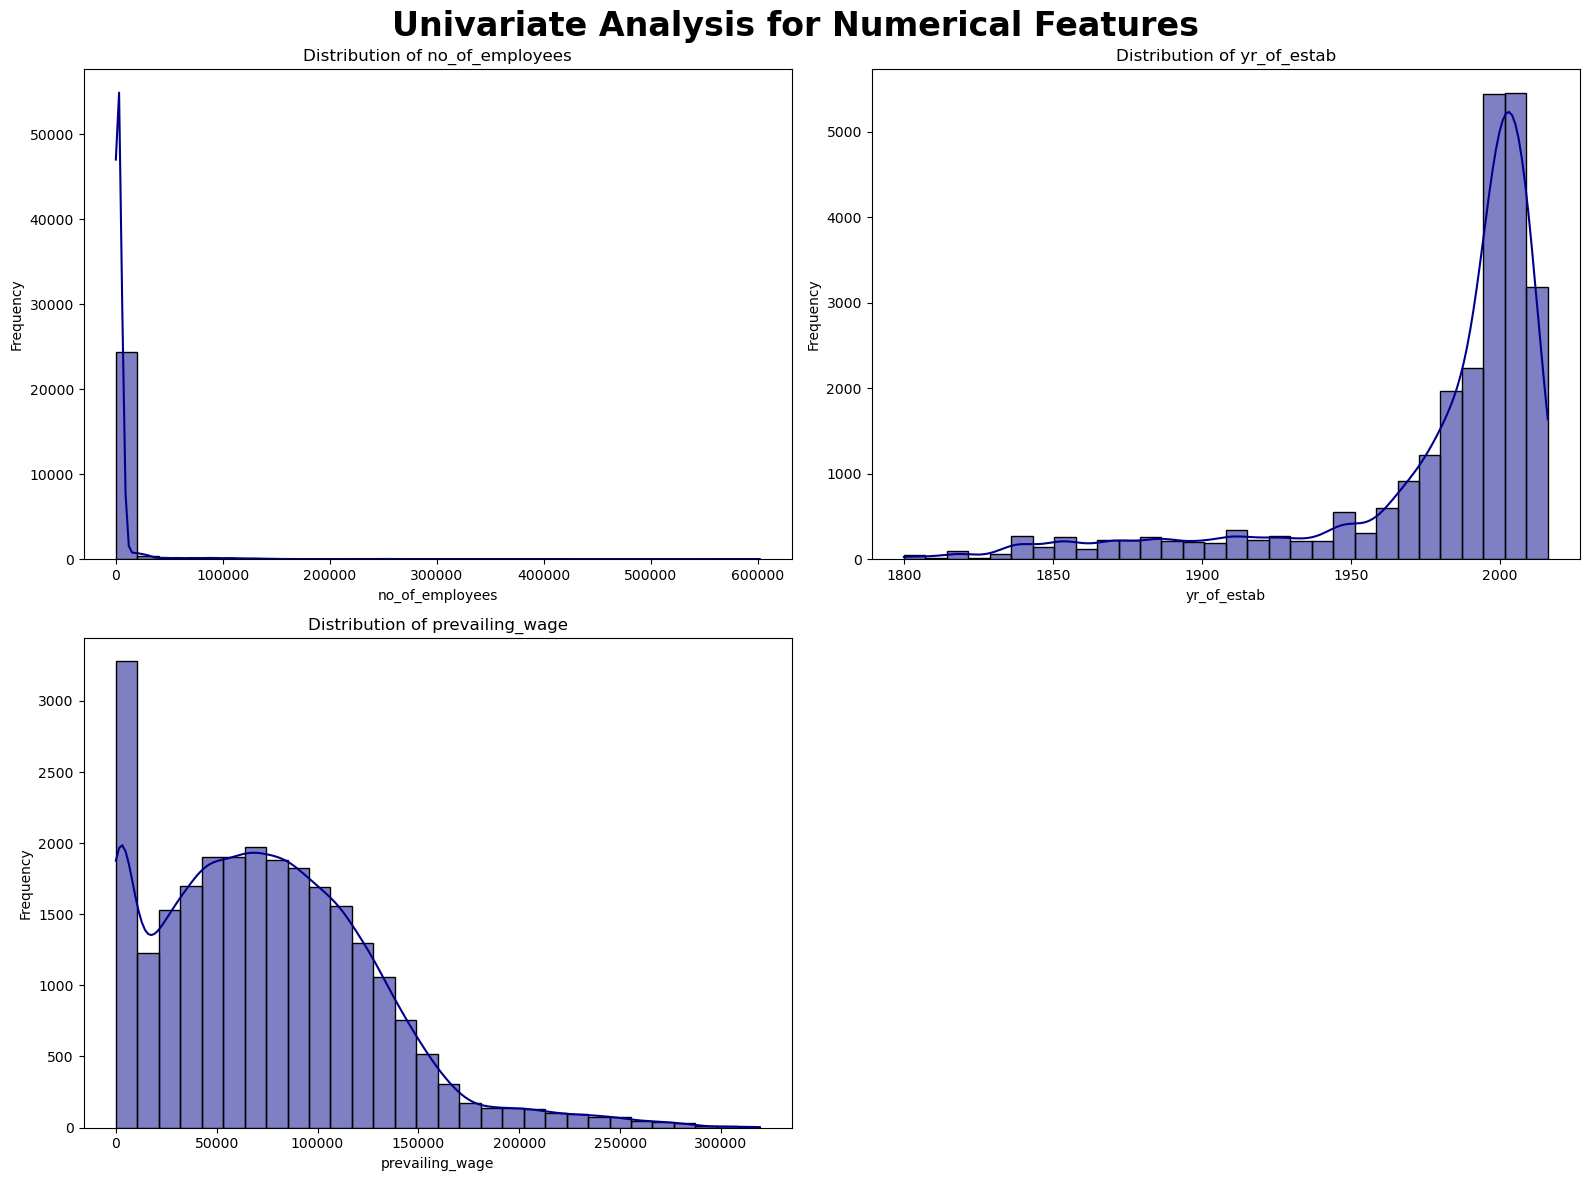

In [838]:
# Univariate analysis for Numerical columns. 
# Set up the plot
plt.figure(figsize=(16, 12))
plt.suptitle('Univariate Analysis for Numerical Features', fontsize=24, fontweight='bold')

# Loop through numerical columns
for i, col in enumerate(numerical_cols):  # numerical columns stored in the list numerical_cols
    plt.subplot(2, 2, i + 1)  # Adjusted based on number of features 
    sns.histplot(df[col], bins=30, kde=True, color='DarkBlue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### Insights for the above graphs

- no_of_employees column is more skewed and it is right skewed. Most of the companies have less number of employees, mostly under 10,000.
- Year of establishment is left skewed. Most companies were founded between 1960 to 2015.
- Prevailing wage is right skewed. Peak around 60,000 to 90,000.

### Bivariate Analysis

**Q4: Perform bivariate analysis between independent features and the target variable using visualizations.**  
**Q5: Provide insights on how features like education, experience, pay unit, continent, and prevailing wage influence visa status.**

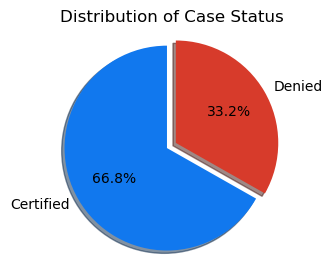

In [841]:
# First will visualize the target Feature using pie plot. 

# Get counts
target_counts = df['case_status'].value_counts()

# Plot
plt.figure(figsize=(3, 3))
explode = (0, 0.1)
plt.pie(
    target_counts,
    labels=target_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    explode=explode,
    colors=['#1178ee', '#d73b2b']
)
plt.title('Distribution of Case Status')
plt.axis('equal')  # Equal aspect ratio makes the pie round
plt.show()


#### Insights
- Most of the applicants are Certified which is over 66.8%
- Denied show 33.2%.
- This data looks imbalanced as the certified is doulbe the denied.

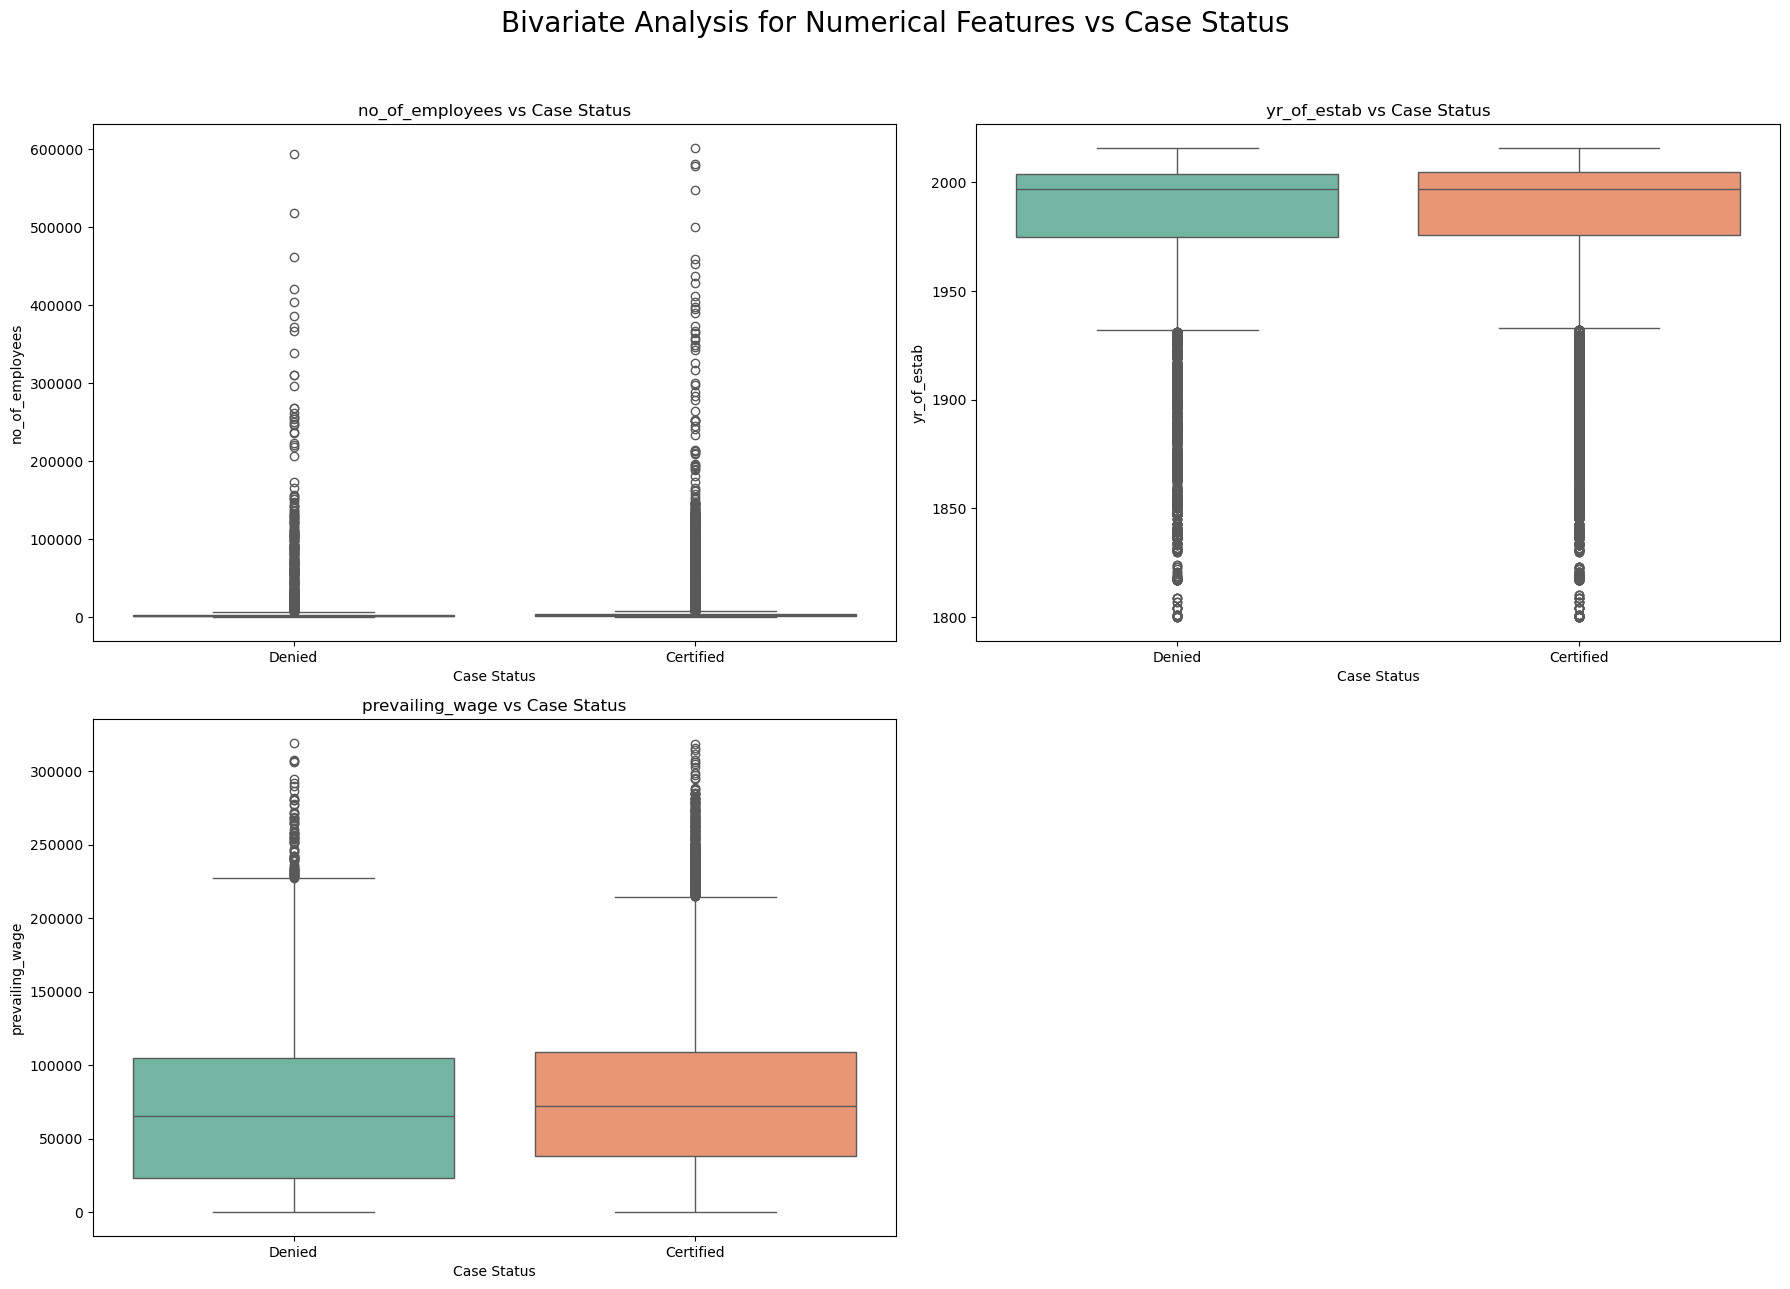

In [616]:
# Bivariate analysis for Numerical columns. 

plt.figure(figsize=(18, len(numerical_cols) * 6))
plt.suptitle('Bivariate Analysis for Numerical Features vs Case Status', fontsize=20, y=1.02)

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 2, i + 1)
    sns.boxplot(data=df, x='case_status', y=col, hue='case_status', palette='Set2', legend=False)
    plt.title(f'{col} vs Case Status')
    plt.xlabel('Case Status')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


#### Insights for Bivariate analysis for numerical columns. 
- No of employees --> Both Certified and Denied categories have a wide range in the number of employees, with a significant number of extreme outliers on the higher end.
- year of establishment --> Certified cases tend to have a slightly more recent establishment year compared to Denied cases.
- prevailing_wage --> Certified applications tend to offer slightly higher wages than Denied ones. There are a number of high-wage outliers in both categories, especially in Certified.

case_status,Certified_count,Denied_count,Total_Applicants,Certified_percentage,Denied_percentage
continent,,,,,
Africa,397,154,551,72.05,27.95
Asia,11012,5849,16861,65.31,34.69
Europe,2957,775,3732,79.23,20.77
North America,2037,1255,3292,61.88,38.12
Oceania,122,70,192,63.54,36.46
South America,493,359,852,57.86,42.14


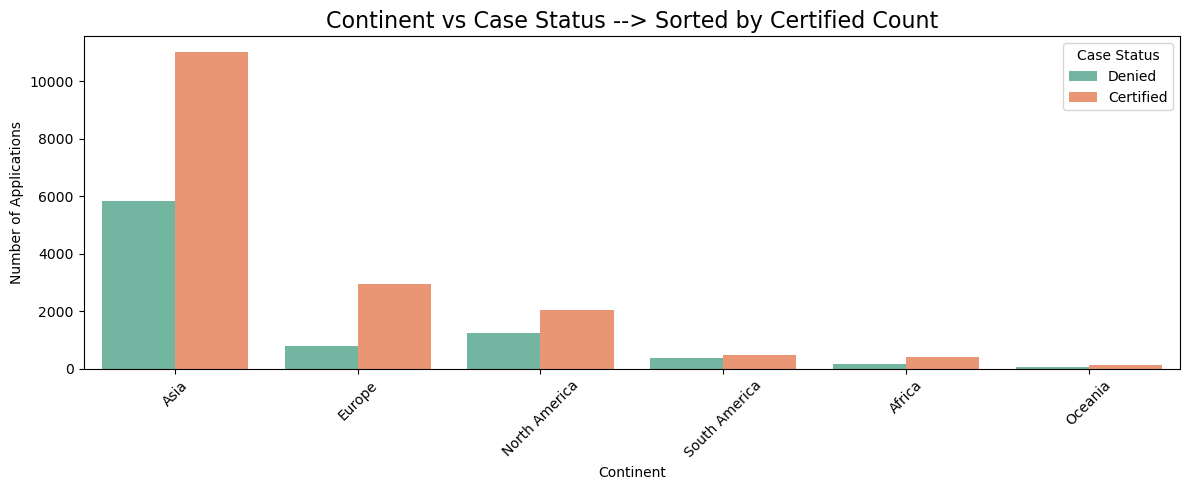

In [864]:
# Bivariate analysis w.r.t continent vs case status:

# Create summary table
summary = (
    df.groupby(['continent', 'case_status'])
    .size()
    .unstack(fill_value=0)
)

summary = summary.rename(columns={'Certified': 'Certified_count', 'Denied': 'Denied_count'})

# Add total and percentage columns
summary['Total_Applicants'] = summary.sum(axis=1)
summary['Certified_percentage'] = (summary['Certified_count'] / summary['Total_Applicants'] * 100).round(2)
summary['Denied_percentage'] = (summary['Denied_count'] / summary['Total_Applicants'] * 100).round(2)

# Reorder columns
summary = summary[['Certified_count', 'Denied_count', 'Total_Applicants', 'Certified_percentage', 'Denied_percentage']]

# Display table
display(summary)

# Sort by absolute number of Certified applications
sorted_order = summary.sort_values('Certified_count', ascending=False).index

# plot the visualization using count plot.
plt.figure(figsize=(12, 5))
sns.countplot(
    data=df, 
    x='continent', 
    hue='case_status', 
    palette='Set2', 
    order=sorted_order
)
plt.title('Continent vs Case Status --> Sorted by Certified Count', fontsize=16)
plt.xlabel('Continent')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45)
plt.legend(title='Case Status')
plt.tight_layout()
plt.show()


#### Insights for continent vs case status
- Europe has the highest approval rate 79.23%
- Asia has the Largest number of applications 16,861
- SouthAmerican has the lowest approval rate 57.86.
- Oceania has the lowest applicant count 192

case_status,Certified_count,Denied_count,Total_Applicants,Certified_percentage,Denied_percentage
education_of_employee,,,,,
Bachelor's,6367,3867,10234,62.21,37.79
Doctorate,1912,280,2192,87.23,12.77
High School,1164,2256,3420,34.04,65.96
Master's,7575,2059,9634,78.63,21.37


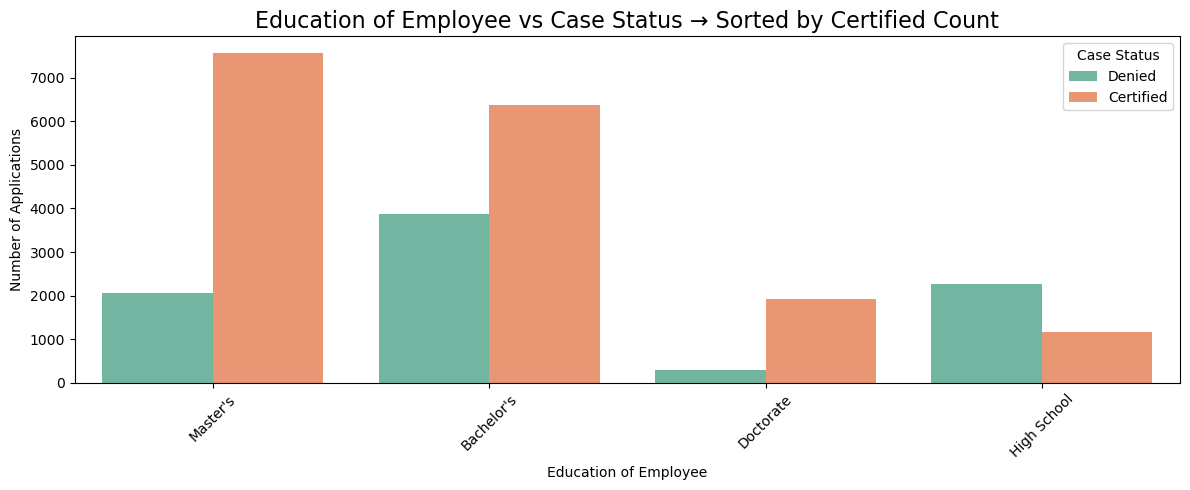

In [866]:
# Bivariate analysis w.r.t education_of_employee vs case_status:

# Create summary table
summary_edu = (
    df.groupby(['education_of_employee', 'case_status'])
    .size()
    .unstack(fill_value=0)
)

# Rename columns
summary_edu = summary_edu.rename(columns={'Certified': 'Certified_count', 'Denied': 'Denied_count'})

# Add total and percentage columns
summary_edu['Total_Applicants'] = summary_edu.sum(axis=1)
summary_edu['Certified_percentage'] = (summary_edu['Certified_count'] / summary_edu['Total_Applicants'] * 100).round(2)
summary_edu['Denied_percentage'] = (summary_edu['Denied_count'] / summary_edu['Total_Applicants'] * 100).round(2)

# Reorder columns
summary_edu = summary_edu[['Certified_count', 'Denied_count', 'Total_Applicants', 'Certified_percentage', 'Denied_percentage']]

# Display table
from IPython.display import display
display(summary_edu)

# Sort by absolute number of Certified applications
sorted_edu = summary_edu.sort_values('Certified_count', ascending=False).index

# Plot the visualization using count plot
plt.figure(figsize=(12, 5))
sns.countplot(
    data=df, 
    x='education_of_employee', 
    hue='case_status', 
    palette='Set2', 
    order=sorted_edu
)
plt.title('Education of Employee vs Case Status → Sorted by Certified Count', fontsize=16)
plt.xlabel('Education of Employee')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45)
plt.legend(title='Case Status')
plt.tight_layout()
plt.show()


#### Insights for education_of_employee vs case_status
- Doctorate holders have the highest approval rate (87.23%) despite a smaller applicant pool which is 2192.
- Master’s degrees follow closely with 78.63% approval with total applicants of 9634.
- High School applicants have the lowest success rate, with nearly 66% of applications being denied from total applicants of 3420 .

case_status,Certified_count,Denied_count,Total_Applicants,Certified_percentage,Denied_percentage
has_job_experience,,,,,
N,5994,4684,10678,56.13,43.87
Y,11024,3778,14802,74.48,25.52


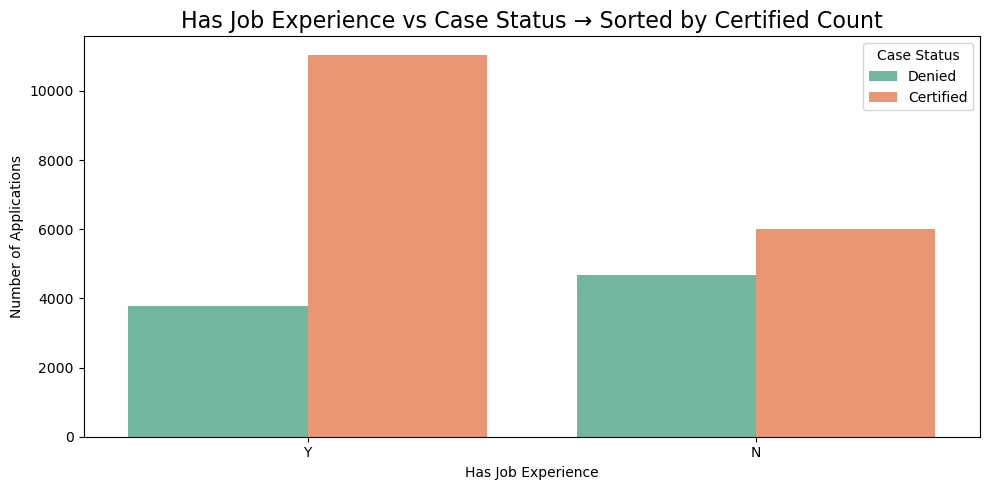

In [620]:
# Bivariate analysis w.r.t has_job_experience vs case_status:

# Create summary table
summary_exp = (
    df.groupby(['has_job_experience', 'case_status'])
    .size()
    .unstack(fill_value=0)
)

# Rename columns
summary_exp = summary_exp.rename(columns={'Certified': 'Certified_count', 'Denied': 'Denied_count'})

# Add total and percentage columns
summary_exp['Total_Applicants'] = summary_exp.sum(axis=1)
summary_exp['Certified_percentage'] = (summary_exp['Certified_count'] / summary_exp['Total_Applicants'] * 100).round(2)
summary_exp['Denied_percentage'] = (summary_exp['Denied_count'] / summary_exp['Total_Applicants'] * 100).round(2)

# Reorder columns
summary_exp = summary_exp[['Certified_count', 'Denied_count', 'Total_Applicants', 'Certified_percentage', 'Denied_percentage']]

# Display table
from IPython.display import display
display(summary_exp)

# Sort by absolute number of Certified applications
sorted_exp = summary_exp.sort_values('Certified_count', ascending=False).index

# Plot the visualization using count plot
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df, 
    x='has_job_experience', 
    hue='case_status', 
    palette='Set2', 
    order=sorted_exp
)
plt.title('Has Job Experience vs Case Status → Sorted by Certified Count', fontsize=16)
plt.xlabel('Has Job Experience')
plt.ylabel('Number of Applications')
plt.legend(title='Case Status')
plt.tight_layout()
plt.show()


#### Insights for has_job_experience vs case_status
- Applicants with job experience have a significantly higher certification rate (74.48%) compared to those without experience (56.13%).
- The denial rate for applicants without experience is 43.87%, whereas it's much lower (25.52%) for those with experience.
- More applications were submitted by experienced candidates 14,802 compared to non-experienced ones 10,678.

case_status,Certified_count,Denied_count,Total_Applicants,Certified_percentage,Denied_percentage
requires_job_training,,,,,
N,15012,7513,22525,66.65,33.35
Y,2006,949,2955,67.88,32.12


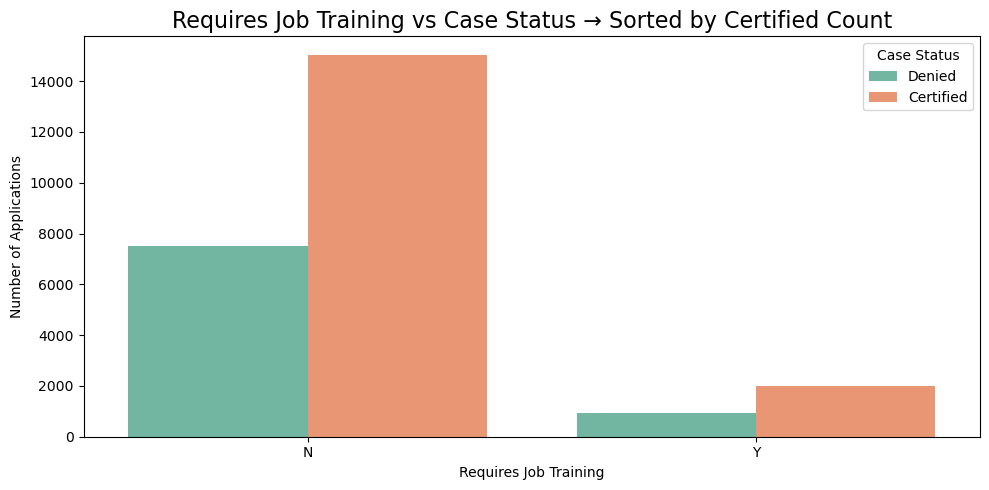

In [621]:
# Bivariate analysis w.r.t requires_job_training vs case_status:

# Create summary table
summary_train = (
    df.groupby(['requires_job_training', 'case_status'])
    .size()
    .unstack(fill_value=0)
)

# Rename columns
summary_train = summary_train.rename(columns={'Certified': 'Certified_count', 'Denied': 'Denied_count'})

# Add total and percentage columns
summary_train['Total_Applicants'] = summary_train.sum(axis=1)
summary_train['Certified_percentage'] = (summary_train['Certified_count'] / summary_train['Total_Applicants'] * 100).round(2)
summary_train['Denied_percentage'] = (summary_train['Denied_count'] / summary_train['Total_Applicants'] * 100).round(2)

# Reorder columns
summary_train = summary_train[['Certified_count', 'Denied_count', 'Total_Applicants', 'Certified_percentage', 'Denied_percentage']]

# Display table
from IPython.display import display
display(summary_train)

# Sort by absolute number of Certified applications
sorted_train = summary_train.sort_values('Certified_count', ascending=False).index

# Plot the visualization using count plot
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df, 
    x='requires_job_training', 
    hue='case_status', 
    palette='Set2', 
    order=sorted_train
)
plt.title('Requires Job Training vs Case Status → Sorted by Certified Count', fontsize=16)
plt.xlabel('Requires Job Training')
plt.ylabel('Number of Applications')
plt.legend(title='Case Status')
plt.tight_layout()
plt.show()


#### Insights for requires_job_training vs case_status
- Certification proportion is slightly higher for applicants requiring job training 67.88% than those who don’t 66.65%.
- Applicants which are not requiring job training are far more in volumes which is 15012.

case_status,Certified_count,Denied_count,Total_Applicants,Certified_percentage,Denied_percentage
region_of_employment,,,,,
Island,226,149,375,60.27,39.73
Midwest,3253,1054,4307,75.53,24.47
Northeast,4526,2669,7195,62.90,37.10
South,4913,2104,7017,70.02,29.98
West,4100,2486,6586,62.25,37.75


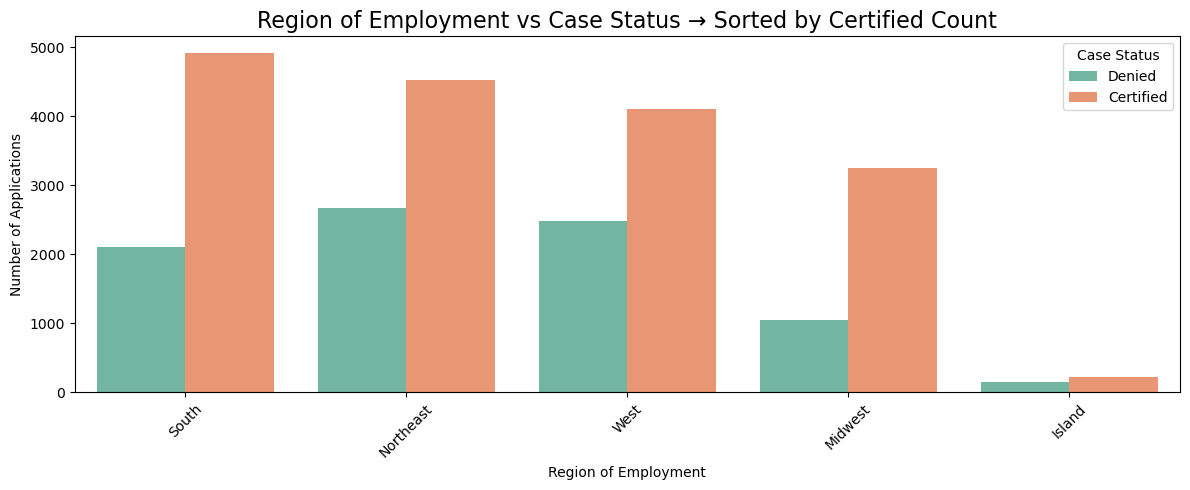

In [622]:
# Bivariate analysis w.r.t region_of_employment vs case_status:

# Create summary table
summary_region = (
    df.groupby(['region_of_employment', 'case_status'])
    .size()
    .unstack(fill_value=0)
)

# Rename columns
summary_region = summary_region.rename(columns={'Certified': 'Certified_count', 'Denied': 'Denied_count'})

# Add total and percentage columns
summary_region['Total_Applicants'] = summary_region.sum(axis=1)
summary_region['Certified_percentage'] = (summary_region['Certified_count'] / summary_region['Total_Applicants'] * 100).round(2)
summary_region['Denied_percentage'] = (summary_region['Denied_count'] / summary_region['Total_Applicants'] * 100).round(2)

# Reorder columns
summary_region = summary_region[['Certified_count', 'Denied_count', 'Total_Applicants', 'Certified_percentage', 'Denied_percentage']]

# Display table
from IPython.display import display
display(summary_region)

# Sort by absolute number of Certified applications
sorted_region = summary_region.sort_values('Certified_count', ascending=False).index

# Plot the visualization using count plot
plt.figure(figsize=(12, 5))
sns.countplot(
    data=df, 
    x='region_of_employment', 
    hue='case_status', 
    palette='Set2', 
    order=sorted_region
)
plt.title('Region of Employment vs Case Status → Sorted by Certified Count', fontsize=16)
plt.xlabel('Region of Employment')
plt.ylabel('Number of Applications')
plt.legend(title='Case Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Insights for region_of_employment vs case_status
- South leads in total number of certified applications 4913, followed by Northeast 4526, West 4100, and Midwest 3253.
- Island has the lowest number of applications overall which is 375 and hence a limited impact.
- The Midwest has the highest certification rate 75.53% despite fewer total applicants.

case_status,Certified_count,Denied_count,Total_Applicants,Certified_percentage,Denied_percentage
unit_of_wage,,,,,
Hour,747,1410,2157,34.63,65.37
Month,55,34,89,61.80,38.20
Week,169,103,272,62.13,37.87
Year,16047,6915,22962,69.89,30.11


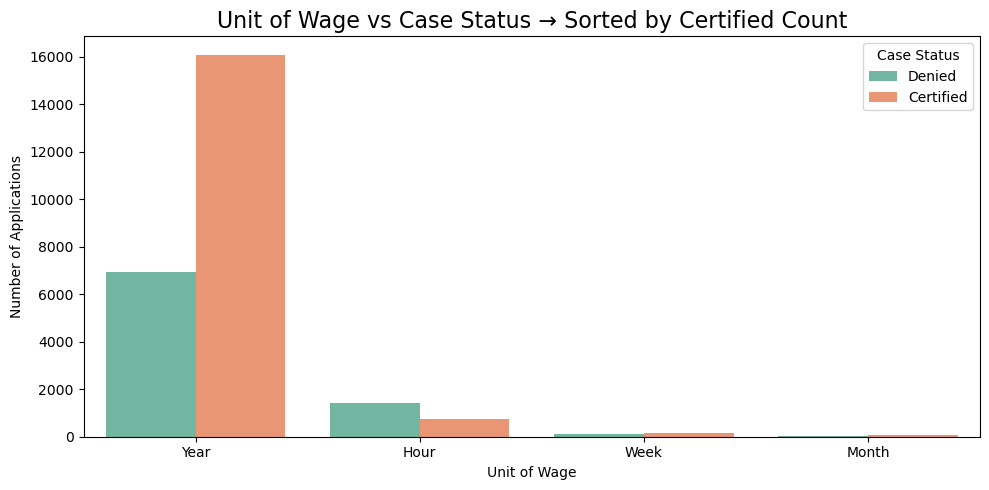

In [623]:
# Bivariate analysis w.r.t unit_of_wage vs case_status:

# Create summary table
summary_wage_unit = (
    df.groupby(['unit_of_wage', 'case_status'])
    .size()
    .unstack(fill_value=0)
)

# Rename columns
summary_wage_unit = summary_wage_unit.rename(columns={'Certified': 'Certified_count', 'Denied': 'Denied_count'})

# Add total and percentage columns
summary_wage_unit['Total_Applicants'] = summary_wage_unit.sum(axis=1)
summary_wage_unit['Certified_percentage'] = (summary_wage_unit['Certified_count'] / summary_wage_unit['Total_Applicants'] * 100).round(2)
summary_wage_unit['Denied_percentage'] = (summary_wage_unit['Denied_count'] / summary_wage_unit['Total_Applicants'] * 100).round(2)

# Reorder columns
summary_wage_unit = summary_wage_unit[['Certified_count', 'Denied_count', 'Total_Applicants', 'Certified_percentage', 'Denied_percentage']]

# Display table
from IPython.display import display
display(summary_wage_unit)

# Sort by absolute number of Certified applications
sorted_wage_unit = summary_wage_unit.sort_values('Certified_count', ascending=False).index

# Plot the visualization using count plot
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df, 
    x='unit_of_wage', 
    hue='case_status', 
    palette='Set2', 
    order=sorted_wage_unit
)
plt.title('Unit of Wage vs Case Status → Sorted by Certified Count', fontsize=16)
plt.xlabel('Unit of Wage')
plt.ylabel('Number of Applications')
plt.legend(title='Case Status')
plt.tight_layout()
plt.show()


#### Insights for unit_of_wage vs case_status
- The Year unit dominates the volume of certified cases which is 16047.
- The Hour unit shows more denials than certifications 65.37.
- Applications with Month and Week wages are relatively fewer but still maintain a 61.80% and 62.13% certification rate.

case_status,Certified_count,Denied_count,Total_Applicants,Certified_percentage,Denied_percentage
full_time_position,,,,,
N,1855,852,2707,68.53,31.47
Y,15163,7610,22773,66.58,33.42


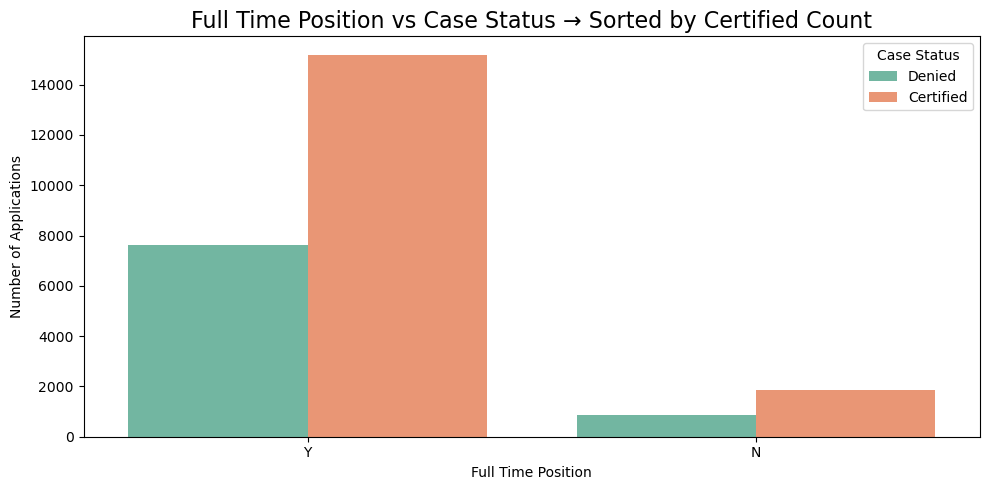

In [625]:
# Bivariate analysis w.r.t full_time_position vs case_status:

# Create summary table
summary_fulltime = (
    df.groupby(['full_time_position', 'case_status'])
    .size()
    .unstack(fill_value=0)
)

# Rename columns
summary_fulltime = summary_fulltime.rename(columns={'Certified': 'Certified_count', 'Denied': 'Denied_count'})

# Add total and percentage columns
summary_fulltime['Total_Applicants'] = summary_fulltime.sum(axis=1)
summary_fulltime['Certified_percentage'] = (summary_fulltime['Certified_count'] / summary_fulltime['Total_Applicants'] * 100).round(2)
summary_fulltime['Denied_percentage'] = (summary_fulltime['Denied_count'] / summary_fulltime['Total_Applicants'] * 100).round(2)

# Reorder columns
summary_fulltime = summary_fulltime[['Certified_count', 'Denied_count', 'Total_Applicants', 'Certified_percentage', 'Denied_percentage']]

# Display table
from IPython.display import display
display(summary_fulltime)

# Sort by absolute number of Certified applications
sorted_fulltime = summary_fulltime.sort_values('Certified_count', ascending=False).index

# Plot the visualization using count plot
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df, 
    x='full_time_position', 
    hue='case_status', 
    palette='Set2', 
    order=sorted_fulltime
)
plt.title('Full Time Position vs Case Status → Sorted by Certified Count', fontsize=16)
plt.xlabel('Full Time Position')
plt.ylabel('Number of Applications')
plt.legend(title='Case Status')
plt.tight_layout()
plt.show()


#### Insights for full_time_position vs case_status
- The certification rate is slightly higher 68.53 for part-time (N) jobs, but volume is low 2707.
- Full-time roles dominates which is of 15163 applicants certified.

### Insight Generation 

**Q6: Summarize key insights based on EDA.**  
**Q7: Answer the predefined EDA questions using visualizations and reasoning.**

**From the above EDA, we have:**

- Most of the applicants are Certified which is over 66.8%
- Denied show 33.2%.
- In the continent column, there are 6 unique values. Most applicants are from Asia (16,861 out of 25,480)
- Asia dominates in the continent with the highest number of applicants, followed by Europe and North America.
- Most of the applicants are from Bachelor's degree which 10,234 out of 25,480.
- The highest eucation level is Batchelor's degress with almost equivalent from Master degree. High School and doctorate contribute very less.
- Majority of applicants have prior job experience (14,802). Eventhough significient amount of applicants do not have job experience.
- Majority of applicants do not require job training (22,525 out of 25,480)
- Northeast is the top employment region (7,195)
- Year is the most common wage unit (22,962). Few jobs are listed as "Hour", and almost none as "Week" or "Month". This confirms that most jobs are full-time salaried positions.
- Certified is the most frequent status showing 17,018 out of 25,480
- no_of_employees column is more skewed and it is right skewed. Most of the companies have less number of employees, mostly under 10,000.
- Year of establishment is left skewed. Most companies were founded between 1960 to 2015.
Prevailing wage is right skewed. Peak around 60,000 to 90,000.
- Doctorate holders have the highest approval rate (87.23%) despite a smaller applicant pool which is 2192.
- Master’s degrees follow closely with 78.63% approval with total applicants of 9634.
- High School applicants have the lowest success rate, with nearly 66% of applications being denied from total applicants of 3420 .
- Applicants with job experience have a significantly higher certification rate (74.48%) compared to those without experience (56.13%).
- The denial rate for applicants without experience is 43.87%, whereas it's much lower (25.52%) for those with experience.
- More applications were submitted by experienced candidates 14,802 compared to non-experienced ones 10,678.
- Certification proportion is slightly higher for applicants requiring job training 67.88% than those who don’t 66.65%.
- Applicants which are not requiring job training are far more in volumes which is 15012.
- South leads in total number of certified applications 4913, followed by Northeast 4526, West 4100, and Midwest 3253.
- Island has the lowest number of applications overall which is 375 and hence a limited impact.
- The Midwest has the highest certification rate 75.53% despite fewer total applicants.
- The Year unit dominates the volume of certified cases which is 16047.
- The Hour unit shows more denials than certifications 65.37.
- Applications with Month and Week wages are relatively fewer but still maintain a 61.80% and 62.13% certification rate.
- The certification rate is slightly higher 68.53 for part-time (N) jobs, but volume is low 2707.
- Full-time roles dominates which is of 15163 applicants certified.





<h3 align="center" style="color:Blue">2. Data Preprocessing </h3>

### Missing Value & Outlier Treatment

**Q8: Identify missing values and justify the chosen treatment method.**  
**Q9: Detect and treat outliers (if any), and provide rationale.**

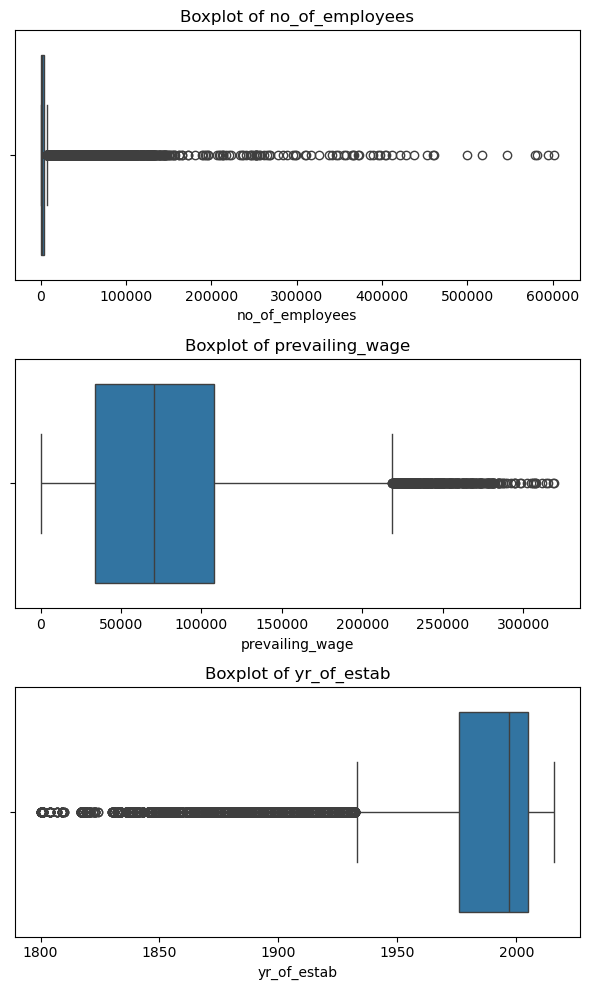

In [632]:
num_cols = ['no_of_employees', 'prevailing_wage', 'yr_of_estab']

plt.figure(figsize=(6, 10))               # one canvas for all three plots
for i, col in enumerate(num_cols, 1):      # enumerate gives i = 1,2,3…
    plt.subplot(len(num_cols), 1, i)       # (rows, cols, index)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


#### Insights

- Boxplots reveal several extreme values in no_of_employees, prevailing_wage, and yr_of_estab.  
- These extremes correspond to genuine business variation (e.g., large companies, high-pay roles, legacy companies), hece we consider as not data entry errors.  
- Removing them would discard valid information or distort the true distribution.  
- Tree-based models (Decision Trees, Random Forests, Bagging) are robust to such outliers and won’t be adversely affected for model performance, hence will keep those outliers as is. 

### Feature Engineering 

**Q10: Create or transform features that help improve model performance and explain the reasoning.**

In [871]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [873]:
# we have the yr_of_estab column, from this will take calculate the company's age till 2016. 

# Compute company age as of FY 2016
df['company_age'] = 2016 - df['yr_of_estab']


In [875]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,9
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,14
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,8
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,119
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,11


In [877]:
# Then dropping the original year column, as we have derived the company age. 
df = df.drop('yr_of_estab', axis=1)

In [879]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,9
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,14
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,8
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,119
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,11


In [881]:
# Encode binary columns as below: 
binary_cols = ['has_job_experience', 'requires_job_training', 'full_time_position']
df[binary_cols] = df[binary_cols].apply(lambda col: col.map({'Y': 1, 'N': 0}))

# perform Ordinal encode for education level as 0, 1, 2, 3
edu_map = {
    'High School': 0,
    "Bachelor's":   1,
    "Master's":     2,
    'Doctorate':    3
}
df['education_of_employee'] = df['education_of_employee'].map(edu_map)

# One-hot encode for nominal categoricals and drop_first=True to avoid multicollinearity.

nominal_cols = ['continent', 'unit_of_wage', 'region_of_employment']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

#  for the target, encode denied = 0, certified = 1 
df['case_status'] = df['case_status'].map({'Denied': 0, 'Certified': 1})

# Check the columns. 

print(df.head())
print("\nEncoded columns:\n", df.columns.tolist())


   education_of_employee  has_job_experience  requires_job_training  \
0                      0                   0                      0   
1                      2                   1                      0   
2                      1                   0                      1   
3                      1                   0                      0   
4                      2                   1                      0   

   no_of_employees  prevailing_wage  full_time_position  case_status  \
0            14513         592.2029                   1            0   
1             2412       83425.6500                   1            1   
2            44444      122996.8600                   1            0   
3               98       83434.0300                   1            0   
4             1082      149907.3900                   1            1   

   company_age  continent_Asia  continent_Europe  continent_North America  \
0            9            True             False               

In [883]:
df.head()

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,case_status,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West
0,0,0,0,14513,592.2029,1,0,9,True,False,False,False,False,False,False,False,False,False,False,True
1,2,1,0,2412,83425.6500,1,1,14,True,False,False,False,False,False,False,True,False,True,False,False
2,1,0,1,44444,122996.8600,1,0,8,True,False,False,False,False,False,False,True,False,False,False,True
3,1,0,0,98,83434.0300,1,0,119,True,False,False,False,False,False,False,True,False,False,False,True
4,2,1,0,1082,149907.3900,1,1,11,False,False,False,False,False,False,False,True,False,False,True,False


In [885]:
# Since the one hot encoded contain true/false, hece conver them into 0 and 1. Find all boolean columns and conver them into int.
bool_cols = df.select_dtypes(include="bool").columns

# Convert them to integers
df[bool_cols] = df[bool_cols].astype(int)


In [887]:
df.head()

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,case_status,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West
0,0,0,0,14513,592.2029,1,0,9,1,0,0,0,0,0,0,0,0,0,0,1
1,2,1,0,2412,83425.6500,1,1,14,1,0,0,0,0,0,0,1,0,1,0,0
2,1,0,1,44444,122996.8600,1,0,8,1,0,0,0,0,0,0,1,0,0,0,1
3,1,0,0,98,83434.0300,1,0,119,1,0,0,0,0,0,0,1,0,0,0,1
4,2,1,0,1082,149907.3900,1,1,11,0,0,0,0,0,0,0,1,0,0,1,0


#### Insights for Feature engineering
- Used Binary Encoding for 'Y'/'N' Columns.
- Since these are binary categorical features, mapping 'Y' to 1 and 'N' to 0 is simple and efficient.
- Ordinal Encoding for Education column. Education has a natural order which is High School < Bachelor's < Master's < Doctorate. Hence used 0, 1, 2, 3.
- One-Hot Encoding for Nominal Categorical Variables which are continent, unit_of_wage, region_of_employment.
- Each category gets its own column, allowing models to treat each category independently.
- drop_first=True prevents multicollinearity
- Label Encoding for Target Variable. case_status → 'Denied': 0, 'Certified': 1

### Train-Test Split 

**Q11: Properly split the dataset into training and testing sets with justification of the split ratio.**

In [890]:
# Separate features and target

X = df.drop('case_status', axis=1)
y = df['case_status']

# Stratified 80/20 split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,    # 20% for testing
    stratify=y,        # preserve class ratio
    random_state=42    # for reproducibility
)

In [892]:
# Verify class distribution remains consistent

print("Overall    :", y.value_counts(normalize=True).round(3).to_dict())
print("Train set  :", y_train.value_counts(normalize=True).round(3).to_dict())
print("Test set   :", y_test.value_counts(normalize=True).round(3).to_dict())

Overall    : {1: 0.668, 0: 0.332}
Train set  : {1: 0.668, 0: 0.332}
Test set   : {1: 0.668, 0: 0.332}


In [894]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Test set     : ", X_test.shape)


# Raw counts
print("Training set counts:")
print(y_train.value_counts())
print("\nTest set counts:")
print(y_test.value_counts())

# Relative frequencies
print("\nTraining set class distribution:")
print(y_train.value_counts(normalize=True).round(3))
print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True).round(3))


Shape of Training set :  (20384, 19)
Shape of Test set     :  (5096, 19)
Training set counts:
case_status
1    13614
0     6770
Name: count, dtype: int64

Test set counts:
case_status
1    3404
0    1692
Name: count, dtype: int64

Training set class distribution:
case_status
1    0.668
0    0.332
Name: proportion, dtype: float64

Test set class distribution:
case_status
1    0.668
0    0.332
Name: proportion, dtype: float64


#### Insights
I have used 80% of the dataset for training and 20% for the testing.  
Then, kept stratify=y to ensure the train and test sets each maintain the same Certified/Denied class proportions as the original dataset.

- Dataset split:
    - 80% of the Traning set --> 20,384 samples.
    - 20% of the training set --> 5,096 samples.
- Feature count, both training and test sets have 19 features each.
- Class counts for Traning samples:
    - Certified (1) --> 13,614
    - Denied (0) --> 6,770
- Class counts for Test samples:
    - Certified (1) --> 3,404
    - Denied (0) --> 1,692


<h3 align="center" style="color:Blue">3. Model Building - Bagging</h3>

### Initial Model Building 

**Q12: Build and evaluate Decision Tree, Bagging, and Random Forest classifiers.**  
**Q13: Compare model performance using metrics like Accuracy, Precision, Recall, F1-Score.**

#### Decision-Tree model

In [655]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             classification_report,
                             confusion_matrix)

# Build and fit the Decision-Tree model
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_clf.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [656]:
# Compute evaluation metrics
acc  = accuracy_score (y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score   (y_test, y_pred)
f1   = f1_score       (y_test, y_pred)

print("Detailed classification report:")
print(classification_report(y_test, y_pred, target_names=['Denied','Certified']))

print("---------- Decision-Tree Performance ----------")
print(f"Accuracy : {acc :.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec :.4f}")
print(f"F1-Score : {f1  :.4f}\n")

Detailed classification report:
              precision    recall  f1-score   support

      Denied       0.49      0.48      0.48      1692
   Certified       0.74      0.75      0.74      3404

    accuracy                           0.66      5096
   macro avg       0.61      0.61      0.61      5096
weighted avg       0.66      0.66      0.66      5096

---------- Decision-Tree Performance ----------
Accuracy : 0.6586
Precision: 0.7438
Recall   : 0.7456
F1-Score : 0.7447



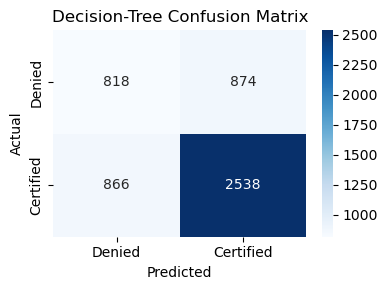

In [657]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Denied','Certified'],
            yticklabels=['Denied','Certified'])
plt.title('Decision-Tree Confusion Matrix')
plt.ylabel('Actual'); plt.xlabel('Predicted')
plt.tight_layout(); plt.show()

#### Bagging model

In [659]:
# Build the Bagging model (200 decision trees by default)
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=None, random_state=42),
    n_estimators=200,          # number of trees
                 # use all CPU cores
    random_state=42
)

# Fit the model
bag_clf.fit(X_train, y_train)

# Predict on test data
y_pred = bag_clf.predict(X_test)

# Evaluation metrics
acc  = accuracy_score (y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score   (y_test, y_pred)
f1   = f1_score       (y_test, y_pred)

print("Detailed classification report:")
print(classification_report(y_test, y_pred, target_names=['Denied','Certified']))

print("---------- Bagging Classifier Performance ----------")
print(f"Accuracy : {acc :.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec :.4f}")
print(f"F1-Score : {f1  :.4f}\n")

Detailed classification report:
              precision    recall  f1-score   support

      Denied       0.60      0.49      0.54      1692
   Certified       0.77      0.84      0.80      3404

    accuracy                           0.72      5096
   macro avg       0.69      0.67      0.67      5096
weighted avg       0.71      0.72      0.72      5096

---------- Bagging Classifier Performance ----------
Accuracy : 0.7243
Precision: 0.7682
Recall   : 0.8411
F1-Score : 0.8030



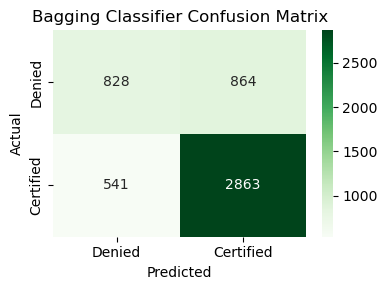

In [660]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Denied','Certified'],
            yticklabels=['Denied','Certified'])
plt.title('Bagging Classifier Confusion Matrix')
plt.ylabel('Actual'); 
plt.xlabel('Predicted')
plt.tight_layout(); 
plt.show()


#### Random-Forest model

In [662]:
# Build and fit the Random-Forest model
rf_clf = RandomForestClassifier(
    random_state=42
)
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Metrics
acc  = accuracy_score (y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score   (y_test, y_pred)
f1   = f1_score       (y_test, y_pred)


print("Detailed classification report:")
print(classification_report(y_test, y_pred, target_names=['Denied','Certified']))

print("---------- Random-Forest Performance ----------")
print(f"Accuracy : {acc :.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec :.4f}")
print(f"F1-Score : {f1  :.4f}\n")


Detailed classification report:
              precision    recall  f1-score   support

      Denied       0.60      0.49      0.54      1692
   Certified       0.77      0.84      0.80      3404

    accuracy                           0.72      5096
   macro avg       0.69      0.66      0.67      5096
weighted avg       0.71      0.72      0.72      5096

---------- Random-Forest Performance ----------
Accuracy : 0.7241
Precision: 0.7675
Recall   : 0.8420
F1-Score : 0.8030



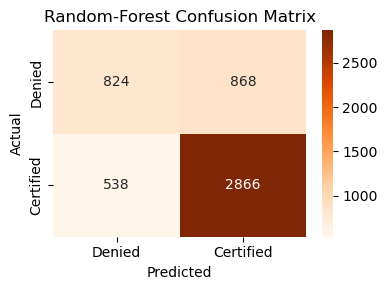

In [663]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Denied','Certified'],
            yticklabels=['Denied','Certified'])
plt.title('Random-Forest Confusion Matrix')
plt.ylabel('Actual'); 
plt.xlabel('Predicted')
plt.tight_layout(); 
plt.show()

In [664]:
# compare the model performance

models_to_compare = [
    ("Decision Tree",   dt_clf),     # DecisionTreeClassifier
    ("Bagging",         bag_clf),    # BaggingClassifier
    ("Random Forest",   rf_clf)      # RandomForestClassifier
]

# Evaluate each model on the same test set

results = []
for name, model in models_to_compare:
    y_pred = model.predict(X_test)

    results.append({
        "Model"     : name,
        "Accuracy"  : accuracy_score (y_test, y_pred),
        "Precision" : precision_score(y_test, y_pred),
        "Recall"    : recall_score   (y_test, y_pred),
        "F1-Score"  : f1_score       (y_test, y_pred)
    })

# Display a comparison table (sorted by F1-score)

metrics_df = (pd.DataFrame(results)
              .set_index("Model")
              .round(3)
              .sort_values("F1-Score", ascending=True))

print("\n----- Model Performance Comparison -----")
print(metrics_df)



----- Model Performance Comparison -----
               Accuracy  Precision  Recall  F1-Score
Model                                               
Decision Tree     0.659      0.744   0.746     0.745
Bagging           0.724      0.768   0.841     0.803
Random Forest     0.724      0.768   0.842     0.803


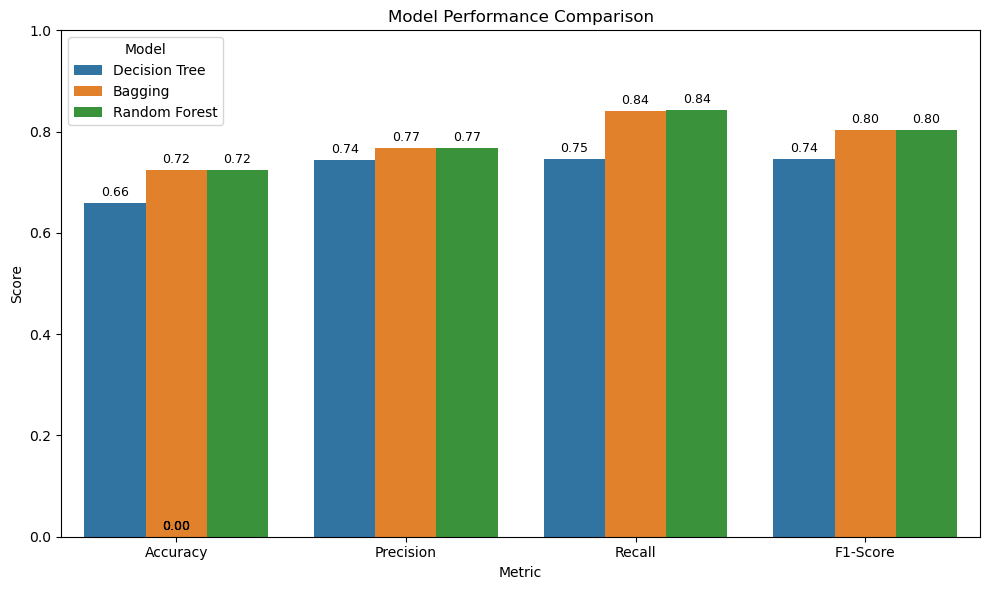

In [665]:
# Plot a bar chart comparing Accuracy, Precision, Recall, and F1-Score for all models with value labels on each bar.
# Prepare data
plot_df = metrics_df.reset_index().melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=plot_df, x='Metric', y='Score', hue='Model')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.tight_layout()

# Add values on bars
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{height:.2f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 3),
                    textcoords='offset points')

plt.show()


#### Insights on Initial Model Building
- Random Forest & Bagging outperform Decision Tree on all metrics --> Accuracy = 0.724 and 0.724, Precision = 0.768 and 0.768, Recall = 0.842 and 0.841, F1-Score = 0.803 and 0.803.
- Accuracy Improvement --> Decision Tree: 65.9% and Bagging & Random Forest: 72.4%. Hence,  around 6.5% increase in accuracy when using ensemble methods.
- Recall Boost --> Decision Tree: 74.6% and Random Forest: 84.2%. Hence, around 10% improvement, indicating ensemble methods capture more actual positive cases.
- A higher F1-score means a better balance between precision and recall. Hence, Bagging & Random Forest has got 0.803.
- Bagging vs. Random Forest --> Nearly identical performance, but Random Forest slightly edges out Bagging in recall 0.842 vs. 0.841.
- Ensemble models (Bagging & Random Forest) are more effective than a single Decision Tree in this case.

### Metric Selection 

**Q14: Select and justify the evaluation metric(s) appropriate for this classification task.**

**Recall**
- It is more important to catch every good application (high recall) even if we occasionally pass a few extra doubtful ones that the officer can double-check.  
- Recall (Certified class) – tells us what % of truly certifiable applications the model captures. so we must keep FN low.

**Precision**  
- Precision (Certified class) – shows what percantage of the model is “Certified” predictions are actually correct.
- If precision is low, then the model is letting lots of not-so-good cases through.

**F1-Score**  
- F1-Score – harmonic mean of precision and recall.
- Balances the two error types in a single number and is robust when classes are imbalanced (≈ 67 % Certified, 33 % Denied).

**Accuracy**
- Accuracy just tells us how many total predictions the model got right.

### Model Interpretation

**Interpret feature importance and model behavior**

All Feature Importances:


,Feature,Importance
4,prevailing_wage,0.258623
3,no_of_employees,0.251536
6,company_age,0.169281
0,education_of_employee,0.111325
1,has_job_experience,0.049425
14,unit_of_wage_Year,0.024940
8,continent_Europe,0.018721
15,region_of_employment_Midwest,0.018587
17,region_of_employment_South,0.014475
2,requires_job_training,0.014121


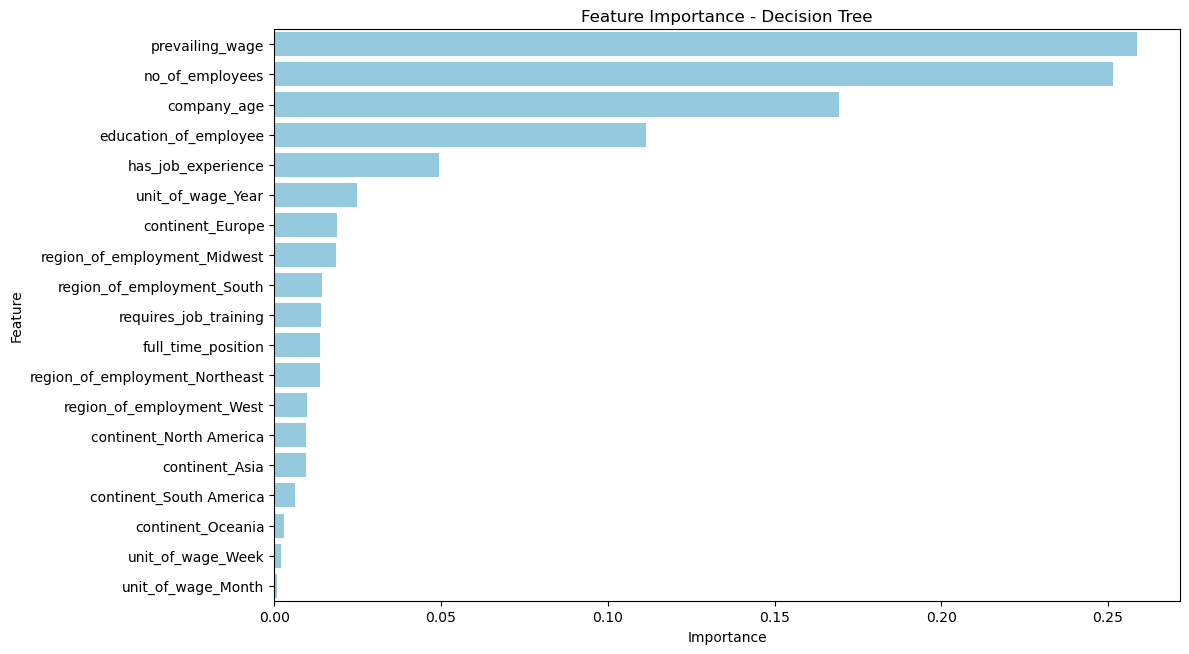

In [671]:
# Feature importance for Decision tree model 

# Get feature importances from the trained model
importances = dt_clf.feature_importances_

# Create a DataFrame for all features
dt_feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display all feature importances
print("All Feature Importances:")
display(dt_feat_imp)

# Plot all feature importances
plt.figure(figsize=(12, len(dt_feat_imp) * 0.35))
sns.barplot(data=dt_feat_imp, x='Importance', y='Feature', color='skyblue')
plt.title('Feature Importance - Decision Tree')
plt.tight_layout()
plt.show()


#### Insights on feature importance for Decission Tree
- The top 5 feature importance for the model prediction are:
    - prevailing_wage (25.8%) --> This is the most critical feature in determining visa approval.
    - no_of_employees (25.15%) --> Reflects company size.
    - company_age (16.92%) --> Older companies may be more stable and trustworthy, influencing approval outcomes.
    - education_of_employee (11.13%) --> Higher education (e.g., Master’s, Doctorate) is often correlated with high-demand skilled roles.
    - has_job_experience (04.94%) --> Practical experience increases the odds of visa certification, supporting the candidate's eligibility.
- Least Influential Features:
    - Geographical and wage unit attributes are less influential—possibly due to low variance or dominance of a few categories.


All Feature Importances:


,Feature,Importance
4,prevailing_wage,0.271961
3,no_of_employees,0.242463
6,company_age,0.173794
0,education_of_employee,0.113002
1,has_job_experience,0.045264
8,continent_Europe,0.018390
15,region_of_employment_Midwest,0.016389
5,full_time_position,0.015954
17,region_of_employment_South,0.015783
2,requires_job_training,0.015157


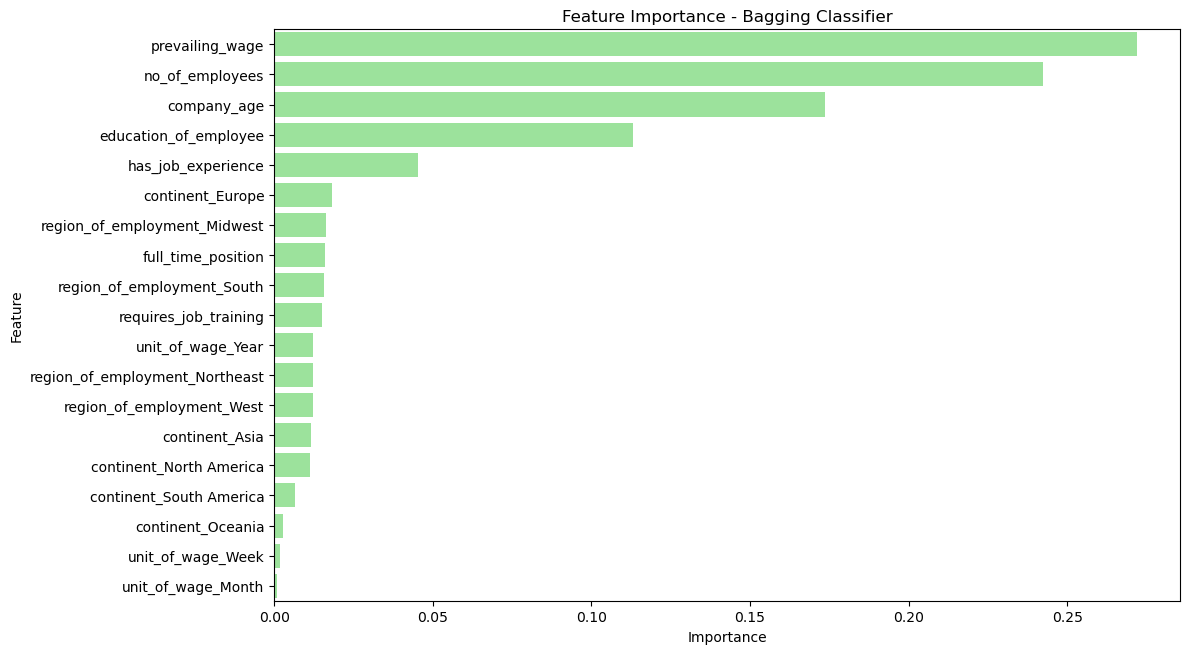

In [672]:
# Feature importance for Bagging tree model 
#  Get average feature importances from all trees
feature_importances = np.mean([
    tree.feature_importances_ for tree in bag_clf.estimators_
], axis=0)

#  Create a DataFrame
bt_feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display all feature importances
print("All Feature Importances:")
display(bt_feat_imp)

#  Plot
plt.figure(figsize=(12, len(bt_feat_imp) * 0.35))
sns.barplot(data=bt_feat_imp, x='Importance', y='Feature', color='lightgreen')
plt.title('Feature Importance - Bagging Classifier')
plt.tight_layout()
plt.show()


#### Insights on feature importance for Bagging tree  
- The top 5 feature importance for the model prediction are:
    - prevailing_wage (27.2%) --> This is the most critical feature in determining visa approval.
    - no_of_employees (24.2%) --> Reflects company size.
    - company_age (17.4%) --> Older companies may be more stable and trustworthy, influencing approval outcomes.
    - education_of_employee (11.3%) --> Higher education (e.g., Master’s, Doctorate) is often correlated with high-demand skilled roles.
    - has_job_experience (4.5%) --> Practical experience increases the odds of visa certification, supporting the candidate's eligibility.
- Least Influential Features:
    - Unit of Wage: Month, Week, Year --> Minimal importance (<1.5%). Likely due to normalization in analysis or their lower correlation with approval status.
    - Continents: Oceania, South America, North America (very low impact) --> May indicate limited representation in dataset or lesser regional biases in decision-making.


All Feature Importances:


,Feature,Importance
4,prevailing_wage,0.264202
3,no_of_employees,0.242972
6,company_age,0.196277
0,education_of_employee,0.123258
1,has_job_experience,0.044858
14,unit_of_wage_Year,0.020681
8,continent_Europe,0.013931
5,full_time_position,0.013670
2,requires_job_training,0.013473
7,continent_Asia,0.010378


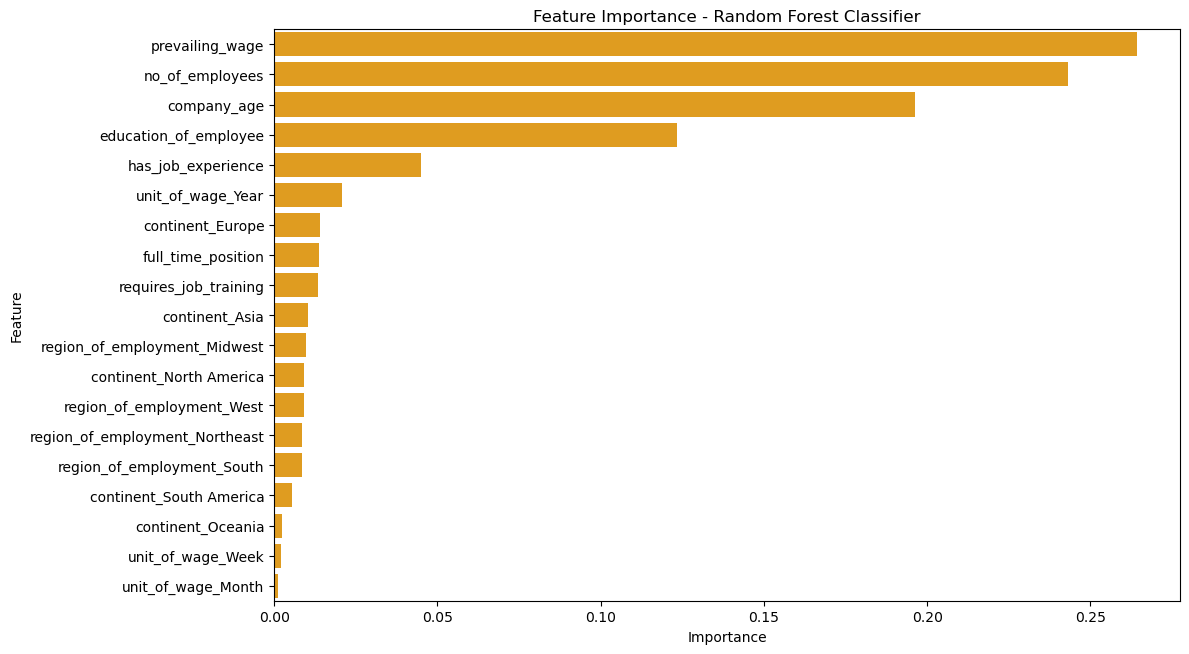

In [673]:
# Feature importance for Random forest classifier model 

# Extract feature importances
rf_importances = rf_clf.feature_importances_

# Create DataFrame with feature names and importance values
rf_feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

#  Display the full table
print("All Feature Importances:")
display(rf_feat_imp)

#  Plot feature importance
plt.figure(figsize=(12, len(rf_feat_imp) * 0.35))
sns.barplot(data=rf_feat_imp, x='Importance', y='Feature', color='orange')
plt.title('Feature Importance - Random Forest Classifier')
plt.tight_layout()
plt.show()


#### Insights on feature importance for Random Forest classifier  
- The top 5 feature importance for the model prediction are:
    - prevailing_wage (26.42%) --> This is the most critical feature in determining visa approval.
    - no_of_employees (24.29%) --> Reflects company size.
    - company_age (19.62%) --> Older companies may be more stable and trustworthy, influencing approval outcomes.
    - education_of_employee (12.32%) --> Higher education (e.g., Master’s, Doctorate) is often correlated with high-demand skilled roles.
    - has_job_experience (04.48%) --> Practical experience increases the odds of visa certification, supporting the candidate's eligibility.
- Least Influential Features:
    - Regional and continent-based features like: continent_Europe, region_of_employment_Midwest, continent_Asia, continent_North America, each contribute < 0.015
    - Employment type (full_time_position) and job training (requires_job_training) are relatively minor in decision-making.
    - Very low importance seen for: continent_South America, continent_Oceania, unit_of_wage_Week, unit_of_wage_Month (all < 0.01)


<h3 align="center" style="color:Blue">4. Model Improvement - Bagging </h3>

### Hyperparameter Tuning 

**Q16: Perform hyperparameter tuning for Decision Tree, Bagging, and Random Forest models.**  
**Q17: Evaluate and compare performance of tuned models across all metrics.**

#### Hyperparameter tuning for Decision Tree model

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

----- Tuned Decision Tree Performance -----
Accuracy : 0.7290
Precision: 0.7414
Recall   : 0.9127
F1-Score : 0.8182

Classification Report:
              precision    recall  f1-score   support

      Denied       0.67      0.36      0.47      1692
   Certified       0.74      0.91      0.82      3404

    accuracy                           0.73      5096
   macro avg       0.71      0.64      0.64      5096
weighted avg       0.72      0.73      0.70      5096



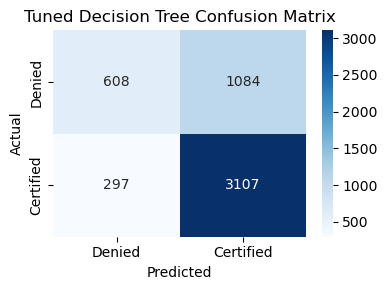

In [678]:
# hyperparameter tuning for Decision Tree

# 1. Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 2. Set up the model and grid search
dt = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(dt, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_dt.fit(X_train, y_train)

# 3. Best estimator and parameters
print("Best Parameters:", grid_dt.best_params_)

# 4. Evaluate the tuned model
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

acc_dt  = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt  = recall_score(y_test, y_pred_dt)
f1_dt   = f1_score(y_test, y_pred_dt)

# 5. Classification report
print("\n----- Tuned Decision Tree Performance -----")
print(f"Accuracy : {acc_dt :.4f}")
print(f"Precision: {prec_dt:.4f}")
print(f"Recall   : {rec_dt :.4f}")
print(f"F1-Score : {f1_dt  :.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['Denied', 'Certified']))

# 6. Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Denied','Certified'],
            yticklabels=['Denied','Certified'])
plt.title('Tuned Decision Tree Confusion Matrix')
plt.ylabel('Actual'); plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


#### Hyperparameter tuning for Bagging Tree model

Best Parameters (Bagging): {'estimator__max_depth': 10, 'max_features': 0.8, 'max_samples': 0.6, 'n_estimators': 100}

----- Tuned Bagging Classifier Performance -----
Accuracy : 0.7361
Precision: 0.7608
Recall   : 0.8822
F1-Score : 0.8170

Classification Report:
              precision    recall  f1-score   support

      Denied       0.65      0.44      0.53      1692
   Certified       0.76      0.88      0.82      3404

    accuracy                           0.74      5096
   macro avg       0.71      0.66      0.67      5096
weighted avg       0.72      0.74      0.72      5096



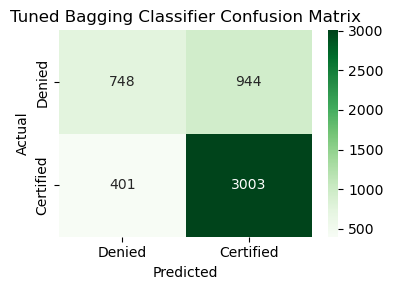

In [680]:
# Hyperparameter tuning for Bagging Tree model

# Define parameter grid for BaggingClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.6, 0.8, 1.0],
    'max_features': [0.8, 1.0],
    'estimator__max_depth': [None, 10, 20]  # ✅ Correct param name for new sklearn
}

# Set up base estimator and BaggingClassifier
base_tree = DecisionTreeClassifier(random_state=42)
bag_model = BaggingClassifier(
    estimator=base_tree,
    random_state=42,
    bootstrap=True,
    n_jobs=-1
)

# Grid Search CV
grid_bag = GridSearchCV(bag_model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_bag.fit(X_train, y_train)

# Best parameters
print("Best Parameters (Bagging):", grid_bag.best_params_)

# Evaluate the tuned model
best_bag = grid_bag.best_estimator_
y_pred_bag = best_bag.predict(X_test)

acc_bag  = accuracy_score(y_test, y_pred_bag)
prec_bag = precision_score(y_test, y_pred_bag)
rec_bag  = recall_score(y_test, y_pred_bag)
f1_bag   = f1_score(y_test, y_pred_bag)

print("\n----- Tuned Bagging Classifier Performance -----")
print(f"Accuracy : {acc_bag :.4f}")
print(f"Precision: {prec_bag:.4f}")
print(f"Recall   : {rec_bag :.4f}")
print(f"F1-Score : {f1_bag  :.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_bag, target_names=['Denied', 'Certified']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_bag)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Denied','Certified'],
            yticklabels=['Denied','Certified'])
plt.title('Tuned Bagging Classifier Confusion Matrix')
plt.ylabel('Actual'); plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


#### Hyperparameter tuning for Random Forest Classifier model

Best Parameters (Random Forest): {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}

----- Tuned Random Forest Classifier Performance -----
Accuracy : 0.7394
Precision: 0.7675
Recall   : 0.8749
F1-Score : 0.8177

Classification Report:
              precision    recall  f1-score   support

      Denied       0.65      0.47      0.54      1692
   Certified       0.77      0.87      0.82      3404

    accuracy                           0.74      5096
   macro avg       0.71      0.67      0.68      5096
weighted avg       0.73      0.74      0.73      5096



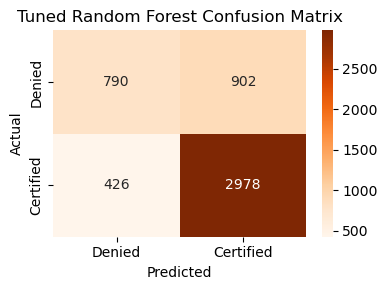

In [682]:
# Hyperparameter tuning for Random Forest Classifier model

# Define parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [10, 15, 20, 25, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the RandomForest model
rf_model = RandomForestClassifier(random_state=42)

# Grid Search CV
grid_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best parameters
print("Best Parameters (Random Forest):", grid_rf.best_params_)

# Evaluate the tuned model
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

acc_rf  = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf  = recall_score(y_test, y_pred_rf)
f1_rf   = f1_score(y_test, y_pred_rf)

print("\n----- Tuned Random Forest Classifier Performance -----")
print(f"Accuracy : {acc_rf :.4f}")
print(f"Precision: {prec_rf:.4f}")
print(f"Recall   : {rec_rf :.4f}")
print(f"F1-Score : {f1_rf  :.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Denied', 'Certified']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Denied','Certified'],
            yticklabels=['Denied','Certified'])
plt.title('Tuned Random Forest Confusion Matrix')
plt.ylabel('Actual'); plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


### Insights from Tuning 

**Q18: Comment on the effect of hyperparameter tuning on model performance.**

#### Insights for after the model tuning:
**Decision Tree**
- Highest recall (0.9127) among the three: excels in identifying "Certified" applications which is True Positives.
- Precision is lowest (0.7414), indicating more false positives (labeling Denied as Certified).
- Good F1-score (0.8182), but lower than the ensemble models in overall stability.
- Poor performance on 'Denied' class (precision: 0.67, recall: 0.36, f1: 0.47).

**Bagging Classifier**
- Improves on all metrics over Decision Tree:
    - Accuracy: 0.7361
    - F1-Score: 0.8170
Better balance between precision and recall.
- Still relatively weak in predicting 'Denied' (f1: 0.53) though better than Decision Tree.

**Random Forest**
- Best overall balance:
    - Accuracy: 0.7394
    - Precision: 0.7675
    - F1-Score: 0.8177 (highest after tuning)
- Strongest in predicting both classes:
    - Denied class recall improved to 0.47
    - Certified class precision (0.77) and recall (0.87) are both strong.
- Indicates robust generalization and best performance among the three.

**Overall**
- If high recall is the top priority like minimizing false negatives for Certified, Decision Tree is best.
- If the need is stability and robustness, choose either Random Forest or Bagging.



<h3 align="center" style="color:Blue">5. Model Building & Improvement - Boosting</h3>

### Initial Model Building 

**Q19: Build AdaBoost and Gradient Boosting models and evaluate their performance.**  
**Q20: Compare results with Bagging models using chosen metrics.**

----- AdaBoost Classifier Performance -----
Accuracy : 0.7298
Precision: 0.7550
Recall   : 0.8816
F1-Score : 0.8134
Classification Report:
              precision    recall  f1-score   support

      Denied       0.64      0.42      0.51      1692
   Certified       0.75      0.88      0.81      3404

    accuracy                           0.73      5096
   macro avg       0.70      0.65      0.66      5096
weighted avg       0.72      0.73      0.71      5096



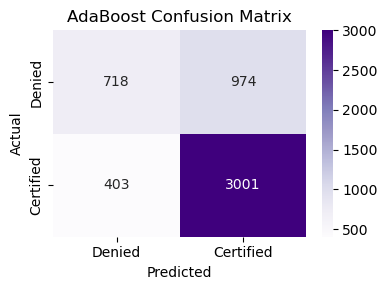

In [688]:
# AdaBoost Classifier Model
ada_clf = AdaBoostClassifier(algorithm='SAMME', random_state=42)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)

# Evaluation
print("----- AdaBoost Classifier Performance -----")
print(f"Accuracy : {accuracy_score(y_test, y_pred_ada):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_ada):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_ada):.4f}")
print(f"F1-Score : {f1_score(y_test, y_pred_ada):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_ada, target_names=['Denied', 'Certified']))

# Confusion Matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Denied', 'Certified'],
            yticklabels=['Denied', 'Certified'])
plt.title('AdaBoost Confusion Matrix')
plt.ylabel('Actual'); plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


----- Gradient Boosting Classifier Performance -----
Accuracy : 0.7396
Precision: 0.7693
Recall   : 0.8716
F1-Score : 0.8172
Classification Report:
              precision    recall  f1-score   support

      Denied       0.65      0.47      0.55      1692
   Certified       0.77      0.87      0.82      3404

    accuracy                           0.74      5096
   macro avg       0.71      0.67      0.68      5096
weighted avg       0.73      0.74      0.73      5096



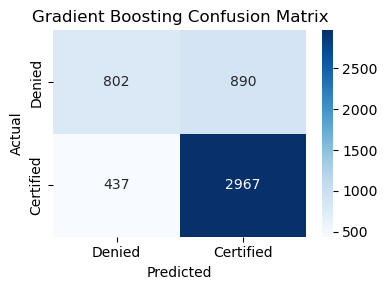

In [689]:
# Gradient Boosting Classifier model
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)

# Evaluation
print("----- Gradient Boosting Classifier Performance -----")
print(f"Accuracy : {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_gb):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_gb):.4f}")
print(f"F1-Score : {f1_score(y_test, y_pred_gb):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_gb, target_names=['Denied', 'Certified']))

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Denied', 'Certified'],
            yticklabels=['Denied', 'Certified'])
plt.title('Gradient Boosting Confusion Matrix')
plt.ylabel('Actual'); plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [690]:
# comparing the adaboost and gradient boosting performance.

# List of models to compare
boost_models = [
    ("AdaBoost", ada_clf),                # your fitted AdaBoost model
    ("Gradient Boosting", gb_clf)         # your fitted Gradient Boosting model
]

# Create list to store metric results
boost_results = []

# Evaluate each model on test data
for name, model in boost_models:
    y_pred = model.predict(X_test)
    
    boost_results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

# Convert to DataFrame
boost_df = pd.DataFrame(boost_results).set_index("Model").round(3)

# Display comparison table
print("\n ----- Boosting Models Performance Comparison -----")
print(boost_df)




 ----- Boosting Models Performance Comparison -----
                   Accuracy  Precision  Recall  F1-Score
Model                                                   
AdaBoost               0.73      0.755   0.882     0.813
Gradient Boosting      0.74      0.769   0.872     0.817


#### Insights for Adaboost and Gradient performance before tuning
- AdaBoost shows higher recall (0.8816), meaning it captures more of the actual "Certified" cases correctly.
- Gradient Boosting has higher accuracy, precision, and F1-Score, especially for the minority class Denied.
- AdaBoost performs slightly better in recall, particularly helpful if the business goal is to minimize false negatives for Certified applications.
- Use AdaBoost if, the priority is to capture as many Certified applications as possible.
- Use Gradient Boosting if, business need balanced performance across both classes and want higher confidence in "Denied" classification.

### Hyperparameter Tuning for AdaBoost And Gradient Boosting

**Q21: Tune AdaBoost and Gradient Boosting models.**  
**Q22: Analyze improvement post tuning using metrics and visual tools.**

Best Parameters (AdaBoost): {'estimator__max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 50}

----- Tuned AdaBoost Classifier Performance -----
Accuracy : 0.7347
Precision: 0.7552
Recall   : 0.8919
F1-Score : 0.8179

Classification Report:
              precision    recall  f1-score   support

      Denied       0.66      0.42      0.51      1692
   Certified       0.76      0.89      0.82      3404

    accuracy                           0.73      5096
   macro avg       0.71      0.66      0.66      5096
weighted avg       0.72      0.73      0.72      5096



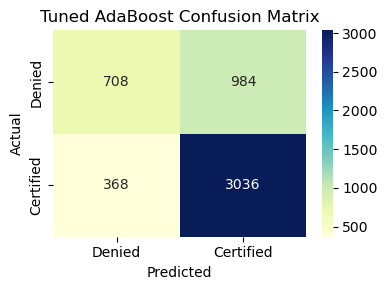

In [693]:
# Tuning the AdaBoost model.

# Define parameter grid 
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'estimator__max_depth': [1, 2, 3]
}

# Base estimator
base_dt = DecisionTreeClassifier(random_state=42)

# AdaBoost model (use 'estimator')
ada_model = AdaBoostClassifier(estimator=base_dt, algorithm='SAMME', random_state=42)

# Grid search
grid_ada = GridSearchCV(ada_model, param_grid_ada, cv=5, scoring='f1', n_jobs=-1)
grid_ada.fit(X_train, y_train)

# Best parameters
print("Best Parameters (AdaBoost):", grid_ada.best_params_)

# Best estimator
best_ada = grid_ada.best_estimator_

# Predictions
y_pred_ada = best_ada.predict(X_test)

# Evaluation
acc_ada  = accuracy_score(y_test, y_pred_ada)
prec_ada = precision_score(y_test, y_pred_ada)
rec_ada  = recall_score(y_test, y_pred_ada)
f1_ada   = f1_score(y_test, y_pred_ada)

print("\n----- Tuned AdaBoost Classifier Performance -----")
print(f"Accuracy : {acc_ada :.4f}")
print(f"Precision: {prec_ada:.4f}")
print(f"Recall   : {rec_ada :.4f}")
print(f"F1-Score : {f1_ada  :.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_ada, target_names=['Denied', 'Certified']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Denied', 'Certified'],
            yticklabels=['Denied', 'Certified'])
plt.title('Tuned AdaBoost Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


Best Parameters (Gradient Boosting): {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}

----- Tuned Gradient Boosting Performance -----
Accuracy : 0.7402
Precision: 0.7710
Recall   : 0.8693
F1-Score : 0.8172

Classification Report:
              precision    recall  f1-score   support

      Denied       0.65      0.48      0.55      1692
   Certified       0.77      0.87      0.82      3404

    accuracy                           0.74      5096
   macro avg       0.71      0.67      0.68      5096
weighted avg       0.73      0.74      0.73      5096



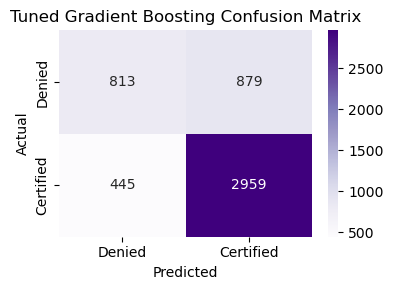

In [694]:
# Tune Gradient Boosting model.

# Define parameter grid
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Grid search
grid_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='f1', n_jobs=-1)
grid_gb.fit(X_train, y_train)

# Best parameters
print("Best Parameters (Gradient Boosting):", grid_gb.best_params_)

# Evaluate tuned model
best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)

acc_gb  = accuracy_score(y_test, y_pred_gb)
prec_gb = precision_score(y_test, y_pred_gb)
rec_gb  = recall_score(y_test, y_pred_gb)
f1_gb   = f1_score(y_test, y_pred_gb)

print("\n----- Tuned Gradient Boosting Performance -----")
print(f"Accuracy : {acc_gb :.4f}")
print(f"Precision: {prec_gb:.4f}")
print(f"Recall   : {rec_gb :.4f}")
print(f"F1-Score : {f1_gb  :.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_gb, target_names=['Denied', 'Certified']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Denied','Certified'],
            yticklabels=['Denied','Certified'])
plt.title('Tuned Gradient Boosting Confusion Matrix')
plt.ylabel('Actual'); plt.xlabel('Predicted')
plt.tight_layout()
plt.show()



In [695]:
# Comparision matrix for Tuned AdaBoost vs Gradient Boosting 
# Create a list of tuned models
boost_models = [
    ("AdaBoost", best_ada),            # Tuned AdaBoost model
    ("Gradient Boosting", best_gb)     # Tuned Gradient Boosting model
]

# Evaluate both models
boost_results = []
for name, model in boost_models:
    y_pred = model.predict(X_test)
    boost_results.append({
        "Model"     : name,
        "Accuracy"  : accuracy_score (y_test, y_pred),
        "Precision" : precision_score(y_test, y_pred),
        "Recall"    : recall_score   (y_test, y_pred),
        "F1-Score"  : f1_score       (y_test, y_pred)
    })

# Create DataFrame
boost_metrics_df = (pd.DataFrame(boost_results)
                    .set_index("Model")
                    .round(3)
                    )

# Display comparison table
print("----- Tuned AdaBoost vs Gradient Boosting -----")
print(boost_metrics_df)


----- Tuned AdaBoost vs Gradient Boosting -----
                   Accuracy  Precision  Recall  F1-Score
Model                                                   
AdaBoost              0.735      0.755   0.892     0.818
Gradient Boosting     0.740      0.771   0.869     0.817


In [696]:
# Comparision matrix for AdaBoost & Gradient Boosting, Before vs After Tuning
# List of all models to compare
all_boost_models = [
    ("AdaBoost (Before Tuning)", ada_clf),
    ("AdaBoost (After Tuning)", best_ada),
    ("Gradient Boosting (Before Tuning)", gb_clf),
    ("Gradient Boosting (After Tuning)", best_gb)
]

# Evaluate each model
all_boost_results = []
for name, model in all_boost_models:
    y_pred = model.predict(X_test)
    all_boost_results.append({
        "Model"     : name,
        "Accuracy"  : accuracy_score (y_test, y_pred),
        "Precision" : precision_score(y_test, y_pred),
        "Recall"    : recall_score   (y_test, y_pred),
        "F1-Score"  : f1_score       (y_test, y_pred)
    })

# Convert to DataFrame
comparison_df = (pd.DataFrame(all_boost_results)
                 .set_index("Model")
                 .round(3)
                 )

# Display the comparison table
print("----- AdaBoost & Gradient Boosting: Before vs After Tuning -----")
print(comparison_df)


----- AdaBoost & Gradient Boosting: Before vs After Tuning -----
                                   Accuracy  Precision  Recall  F1-Score
Model                                                                   
AdaBoost (Before Tuning)              0.730      0.755   0.882     0.813
AdaBoost (After Tuning)               0.735      0.755   0.892     0.818
Gradient Boosting (Before Tuning)     0.740      0.769   0.872     0.817
Gradient Boosting (After Tuning)      0.740      0.771   0.869     0.817


#### Insights on Adaboost and Gradient post tuning:
- Gradient Boosting offers: Slightly higher accuracy  which is +0.005 over the adaboost.
- Better precision — fewer false positives.
- AdaBoost shows: Higher recall 0.892 — better at catching actual positives (Certified).
- Slightly better F1-Score (0.818 vs 0.817) — balanced performance.

**Overall**
- Choose AdaBoost if recall is more important (maximize correct certification approvals).
- Choose Gradient Boosting if you value precision and overall balanced accuracy.

### Interpretation 

**Q23: Interpret feature importance and how boosting methods capture complex patterns.**

---- AdaBoost Feature Importances ----


,Feature,Importance
0,education_of_employee,0.420654
1,has_job_experience,0.326833
8,continent_Europe,0.066928
15,region_of_employment_Midwest,0.062681
14,unit_of_wage_Year,0.046678
4,prevailing_wage,0.044745
17,region_of_employment_South,0.008682
7,continent_Asia,0.005778
5,full_time_position,0.004028
18,region_of_employment_West,0.003961


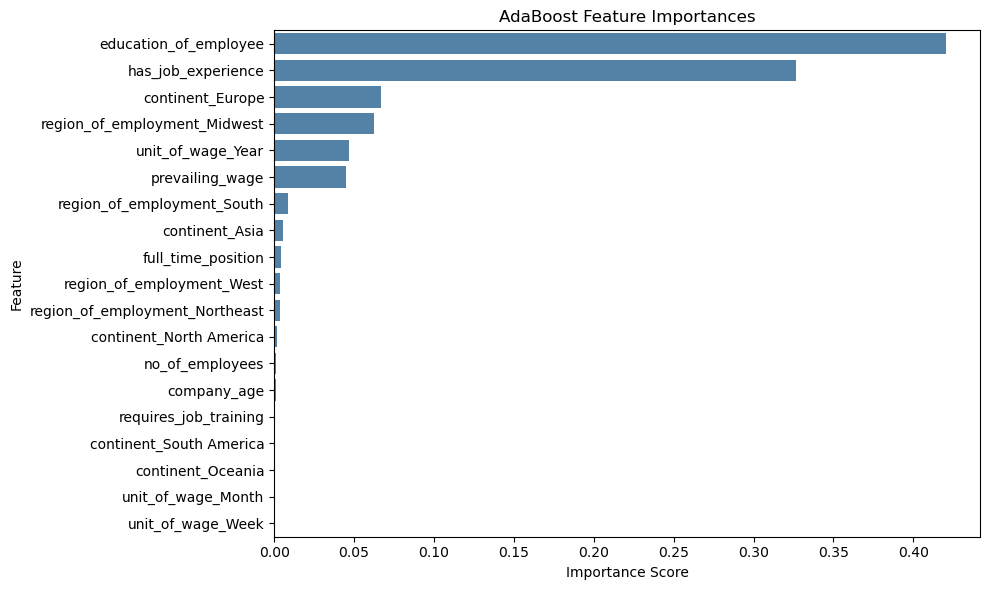

In [699]:
# Feature importance for Adaboost for tuned model

# 1. Get feature importances
ada_feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_ada.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 2. Display all features
print("---- AdaBoost Feature Importances ----")
display(ada_feat_imp)

# 3. Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=ada_feat_imp, x='Importance', y='Feature', color='steelblue')
plt.title('AdaBoost Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



---- Gradient Boosting Feature Importances ----


,Feature,Importance
0,education_of_employee,0.440628
1,has_job_experience,0.171930
4,prevailing_wage,0.113701
8,continent_Europe,0.066132
14,unit_of_wage_Year,0.048759
15,region_of_employment_Midwest,0.030679
18,region_of_employment_West,0.018210
3,no_of_employees,0.017765
5,full_time_position,0.016134
9,continent_North America,0.015435


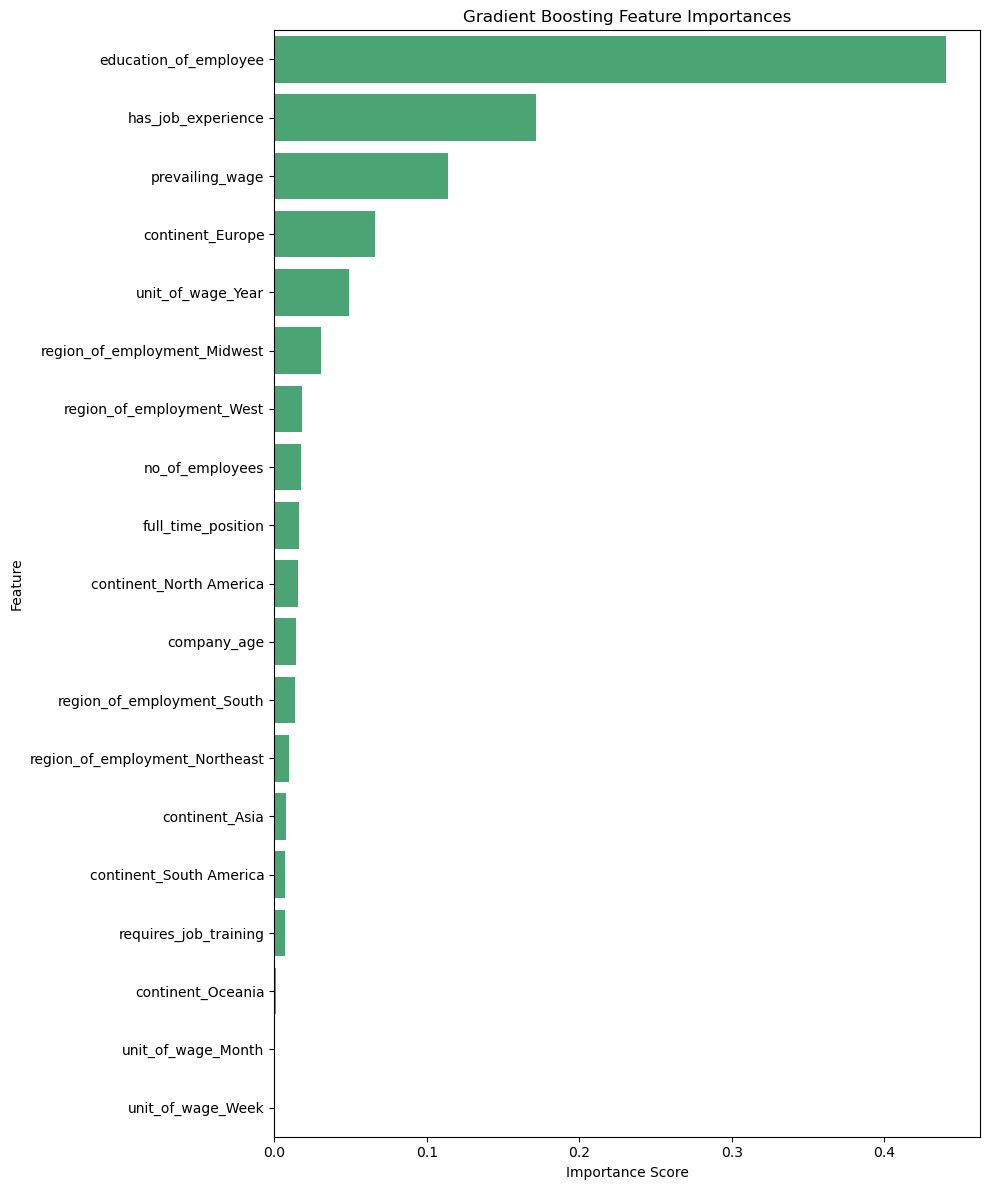

In [700]:
# Feature importance for Gradient boosting for tuned model

#  Get feature importances
gb_feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_gb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display all features
print("---- Gradient Boosting Feature Importances ----")
display(gb_feat_imp)

#  Plot
plt.figure(figsize=(10, 12))
sns.barplot(data=gb_feat_imp, x='Importance', y='Feature', color='mediumseagreen')
plt.title('Gradient Boosting Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [777]:
# List of all models and names (before & after tuning) w.r.t certified.
all_models = [
    ("Decision Tree (Before Tuning)", dt_clf),
    ("Decision Tree (After Tuning)", best_dt),
    
    ("Bagging (Before Tuning)", bag_clf),
    ("Bagging (After Tuning)", best_bag),
    
    ("Random Forest (Before Tuning)", rf_clf),
    ("Random Forest (After Tuning)", best_rf),
    
    ("AdaBoost (Before Tuning)", ada_clf),
    ("AdaBoost (After Tuning)", best_ada),
    
    ("Gradient Boost (Before Tuning)", gb_clf),
    ("Gradient Boost (After Tuning)", best_gb),
]

# Evaluate each model
comparison_results = []
for name, model in all_models:
    y_pred = model.predict(X_test)
    comparison_results.append({
        "Model"     : name,
        "Accuracy"  : accuracy_score (y_test, y_pred),
        "Precision" : precision_score(y_test, y_pred),
        "Recall"    : recall_score   (y_test, y_pred),
        "F1-Score"  : f1_score       (y_test, y_pred)
    })

# Create DataFrame and sort by Recall
comparison_df = (pd.DataFrame(comparison_results)
                 .set_index("Model")
                 .round(4)
                 .sort_values("Recall", ascending=False))

# Display the comparison matrix
print("------- Model Comparison Matrix (Sorted by Recall) -------")
display(comparison_df)


------- Model Comparison Matrix (Sorted by Recall) -------


,Accuracy,Precision,Recall,F1-Score
Model,,,,
Decision Tree (After Tuning),0.7290,0.7414,0.9127,0.8182
AdaBoost (After Tuning),0.7347,0.7552,0.8919,0.8179
Bagging (After Tuning),0.7361,0.7608,0.8822,0.8170
AdaBoost (Before Tuning),0.7298,0.7550,0.8816,0.8134
Random Forest (After Tuning),0.7394,0.7675,0.8749,0.8177
Gradient Boost (Before Tuning),0.7396,0.7693,0.8716,0.8172
Gradient Boost (After Tuning),0.7402,0.7710,0.8693,0.8172
Random Forest (Before Tuning),0.7241,0.7675,0.8420,0.8030
Bagging (Before Tuning),0.7243,0.7682,0.8411,0.8030


In [910]:
# List of all models and names (before & after tuning) w.r.t certified and denied class.
all_models = [
    ("Decision Tree (Before Tuning)", dt_clf),
    ("Decision Tree (After Tuning)", best_dt),

    ("Bagging (Before Tuning)", bag_clf),
    ("Bagging (After Tuning)", best_bag),

    ("Random Forest (Before Tuning)", rf_clf),
    ("Random Forest (After Tuning)", best_rf),

    ("AdaBoost (Before Tuning)", ada_clf),
    ("AdaBoost (After Tuning)", best_ada),

    ("Gradient Boost (Before Tuning)", gb_clf),
    ("Gradient Boost (After Tuning)", best_gb),
]

# Evaluate each model
comparison_results = []
for name, model in all_models:
    y_pred = model.predict(X_test)
    comparison_results.append({
        "Model"              : name,
        "Accuracy"           : accuracy_score(y_test, y_pred),
        "Precision (1-Cert)" : precision_score(y_test, y_pred, pos_label=1),
        "Recall (1-Cert)"    : recall_score(y_test, y_pred, pos_label=1),
        "F1-Score (1-Cert)"  : f1_score(y_test, y_pred, pos_label=1),
        "Recall (0-Denied)"  : recall_score(y_test, y_pred, pos_label=0),
        "Precision (0-Denied)": precision_score(y_test, y_pred, pos_label=0),
        "F1-Score (0-Denied)": f1_score(y_test, y_pred, pos_label=0)
    })

# Create DataFrame and sort by Certified Recall
comparison_df = (pd.DataFrame(comparison_results)
                 .set_index("Model")
                 .round(4)
                 .sort_values("Recall (1-Cert)", ascending=False))

# Display
print("------- Model Comparison Matrix (Including Denied Class) -------")
display(comparison_df)


------- Model Comparison Matrix (Including Denied Class) -------


,Accuracy,Precision (1-Cert),Recall (1-Cert),F1-Score (1-Cert),Recall (0-Denied),Precision (0-Denied),F1-Score (0-Denied)
Model,,,,,,,
Decision Tree (After Tuning),0.7290,0.7414,0.9127,0.8182,0.3593,0.6718,0.4682
AdaBoost (After Tuning),0.7347,0.7552,0.8919,0.8179,0.4184,0.6580,0.5116
Bagging (After Tuning),0.7361,0.7608,0.8822,0.8170,0.4421,0.6510,0.5266
AdaBoost (Before Tuning),0.7298,0.7550,0.8816,0.8134,0.4243,0.6405,0.5105
Random Forest (After Tuning),0.7394,0.7675,0.8749,0.8177,0.4669,0.6497,0.5433
Gradient Boost (Before Tuning),0.7396,0.7693,0.8716,0.8172,0.4740,0.6473,0.5473
Gradient Boost (After Tuning),0.7402,0.7710,0.8693,0.8172,0.4805,0.6463,0.5512
Random Forest (Before Tuning),0.7241,0.7675,0.8420,0.8030,0.4870,0.6050,0.5396
Bagging (Before Tuning),0.7243,0.7682,0.8411,0.8030,0.4894,0.6048,0.5410


<h3 align="center" style="color:Blue">6. Actionable Insights & Final Recommendations</h3>

**Q24: Based on overall analysis, provide at least 3 actionable insights that could help stakeholders.**  
**Q25: Justify the final model selection based on performance and explain how it can be used by EasyVisa.**


#### Insights on 3 actionable insights
- Prioritize High-Paying, Established Companies
    - The top features influencing visa approval include prevailing_wage, no_of_employees, and company_age.
    - Action: Encourage applications from larger, established companies offering higher wages, as these are more likely to get certified.
- Focus on Experienced and Educated Candidates:
    - education_of_employee and has_job_experience significantly affect outcomes.
    - Action: Design policies to prioritize experienced candidates with higher education (Master’s, Doctorate).
    - Provide feedback to applicants about the importance of highlighting relevant work experience
- Choose the Right ML Model for Strategic Goals
    - Gradient Boosting showed the best overall accuracy and precision.
    - AdaBoost delivered the highest recall, ensuring fewer false negatives (missed approvals).

#### Overall Insights for model selection:
Let’s break this down where both certifying eligible applications(certified) and catching ineligible (denied) ones are critical.

**Recall for Certified-1**
- This indicates how well the model identifies approved applicants which is visa certification cases.
Top performers:

    - Decision Tree (After Tuning) → 0.9127  
    - AdaBoost (After Tuning) → 0.8919
    - Bagging (After Tuning) → 0.8822
    - Others are below 0.88

The Decision Tree is the best in finding Certified cases (very high recall), which reduces false negatives.

**Recall for Denied-0**
- This is crucial for spotting likely Denied applicants. We don’t want to miss many of these as false positives are costly.

Top performers:

    - Bagging (Before Tuning) → 0.4894 --> Highest
    - Random Forest (Before Tuning) → 0.4870
    - Gradient Boost (After Tuning) → 0.4805
    - Decision Tree (After Tuning) → 0.3593  --> lowest

Decision Tree, despite high recall for Certified, fails significantly to recall Denied applications.

**Balanced Performance (F1-Scores)**
- For the `Denied` class-0: A higher F1 means the model is good at identifying denied applications, and it's not falsely flagging too many.
- For the `Certified` class-1: A higher F1 means your model accurately certifies applicants without missing many or wrongly approving ineligible ones.

F1-score of Denied class.

Highest F1 (0-Denied):

    - Gradient Boost (After Tuning) → 0.5512 --> Best
    - Gradient Boost (Before Tuning) → 0.5473

Random Forest (After Tuning) → 0.5433

Highest F1 (1-Certified):

    - Decision Tree (After Tuning) → 0.8182 --> Best
    - AdaBoost / Bagging / Random Forest (After Tuning) → All ≈ 0.817

**Final Model Recommendation --> Gradient Boosting (After Tuning)**

Balanced Recall:

    - Certified Recall: 0.8693 (Very Good) --> Captures most eligible applications.
    - Denied Recall: 0.4805 (Among top) --> Better than most models at identifying invalid applications.
    - Best Denied F1-Score: 0.5512 --> Strong balance between precision & recall for minority class.
    - Highest Overall Accuracy: 0.7402

Best Overall Class Handling: Balanced performance across both classes — which is critical for stakeholder trust.

Even though Decission Tree has got highest recall for Certified (0.9127), its very poor recall for Denied (0.3593) makes it risky, hence too many unqualified applicants might be approved. Hence selected **Gradient Boosting.**

**Why Gradient Boosting good fit to EasyVisa**
- Better detection of denied cases prevents legal compliance issues.
- High recall for certified class ensures most eligible applications are approved.
- Balanced model reduces unnecessary manual reviews.

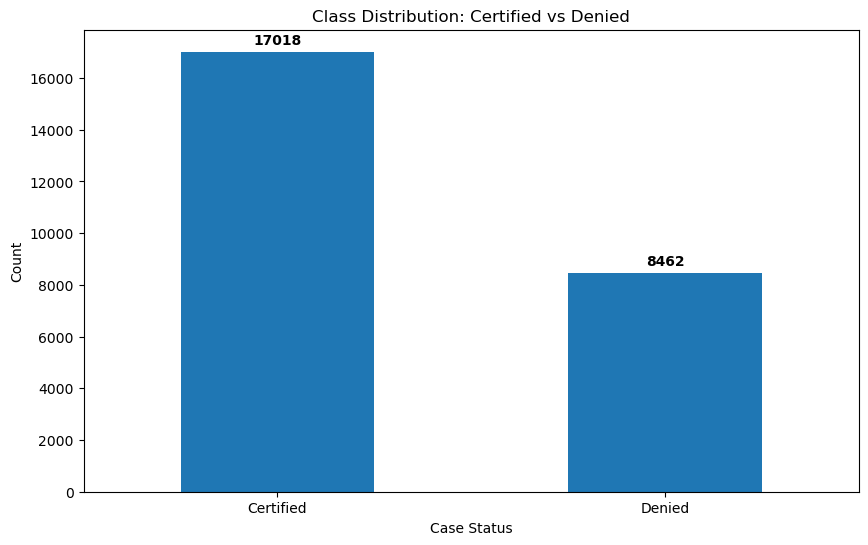

In [20]:
counts = df['case_status'].value_counts()

plt.figure(figsize=(10,6))
counts.plot(kind='bar')

plt.title("Class Distribution: Certified vs Denied")
plt.xlabel("Case Status")
plt.ylabel("Count")

plt.xticks(rotation=0)

# add count values on top of each bar
for i, value in enumerate(counts):
    plt.text(i, value + 300, str(value), ha='center', fontweight='bold')

plt.savefig("class_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


################################# END of the Notebook ##############################################